<a href="https://colab.research.google.com/github/NnannaObi/Data_Science_2_Spring/blob/main/Data_Science_2_Project_Group_6_Heart_Disease_updated.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##     **DATA SCIENCE 2 PROJECT**
###      *Submitted by*
###    Luqman ALHASSAN,
###    Obiabuchi NNANNA,
###         *and*
###  Tagnon Gontran Rodrigue TCHEKLI
###            *To*
###Professor Ikram CHAIRI and Professor Moad Hicham SAFHI



##TASK 1: DATA WRANGLING

In [ ]:
import os
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
import numpy as np
from numpy import set_printoptions
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer, KNNImputer
from sklearn.feature_selection import RFE
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.linear_model import LinearRegression,Lasso, Ridge, LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn import svm
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
!pip install catboost
from catboost import CatBoostRegressor
import warnings
# Ignore all warnings
warnings.filterwarnings('ignore')

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 5.5 MB/s eta 0:00:00


In [ ]:
from google.colab import drive
drive.mount('drive')

Mounted at drive


In [ ]:
os.getcwd()

'/content'

In [ ]:
os.chdir(os.getcwd())

In [ ]:
dfheart = pd.read_csv('/content/drive/MyDrive/dataset/HeartDisease.csv')

HeartDisease :
“ The "goal" refers to the presence of heart disease in the patient.”

-id: Identifying number for each patient. (Integer)

-age: Age of the patient in years. (Integer)

-sex: Gender of the patient (0 = female, 1 = male). (Categorical)

-cp: Type of chest pain experienced by the patient (0 = typical angina, 1 = atypical -angina, 2 = non-anginal pain, 3 = asymptomatic). (Categorical)

-trestbps: Resting blood pressure of the patient (mm Hg). (Integer)

-chol: Serum cholesterol level of the patient (mg/dl). (Integer)

-fbs: Fasting blood sugar level of the patient (> 120 mg/dl = 1, <= 120 mg/dl = 0).(Categorical)

-restecg: Resting electrocardiographic results (0 = normal, 1 = having ST-T wave abnormality, 2 = showing probable or definite left ventricular hypertrophy). (Categorical)

-thalach: Maximum heart rate achieved by the patient. (Integer)

-exang: Exercise-induced angina (0 = no, 1 = yes). (Categorical)

-oldpeak: ST depression induced by exercise relative to rest. (Integer)

-slope: Slope of the peak exercise ST segment (0 = upsloping, 1 = flat, 2 = downsloping). (Categorical)

-ca: Number of major vessels colored by fluoroscopy (0-3). (Integer)

-thal: Thalassemia type (3 = normal; 6 = fixed defect; 7 = reversible defect). (Categorical)

-target: Diagnosis of heart disease (0 = no heart disease, 1-4 = presence of heart disease). (Integer)


### Looking at the Overview of the Dataset

In [ ]:
dfheart.head()

Unnamed: 0     id   age  sex   cp  trestbps   chol  fbs  restecg  thalach  \
0           0   72.0  51.0  1.0  2.0      94.0    NaN  NaN      1.0    154.0   
1           1  125.0  39.0  0.0  2.0       NaN  199.0  0.0      1.0    179.0   
2           2  274.0  58.0  NaN  0.0     100.0    NaN  0.0      NaN    156.0   
3           3   67.0  51.0  NaN  NaN     100.0  222.0  0.0      1.0    143.0   
4           4  254.0   NaN  1.0  NaN     100.0  299.0  0.0      0.0      NaN   

   exang  oldpeak  slope   ca  thal  target  
0    NaN      0.0    2.0  NaN   NaN     NaN  
1    0.0      0.0    NaN  0.0   NaN     1.0  
2    0.0      NaN    2.0  1.0   3.0     0.0  
3    1.0      1.2    1.0  0.0   2.0     1.0  
4    1.0      0.9    1.0  2.0   2.0     NaN

In [ ]:
dfheart.shape

(303, 16)

### Checking the Information About the Datatypes and Number of Null Values

In [ ]:
dfheart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  303 non-null    int64  
 1   id          303 non-null    float64
 2   age         234 non-null    float64
 3   sex         255 non-null    float64
 4   cp          230 non-null    float64
 5   trestbps    239 non-null    float64
 6   chol        244 non-null    float64
 7   fbs         240 non-null    float64
 8   restecg     232 non-null    float64
 9   thalach     239 non-null    float64
 10  exang       241 non-null    float64
 11  oldpeak     246 non-null    float64
 12  slope       233 non-null    float64
 13  ca          237 non-null    float64
 14  thal        250 non-null    float64
 15  target      245 non-null    float64
dtypes: float64(15), int64(1)
memory usage: 38.0 KB


### Checking for the Number of Null Value per Feature

In [ ]:
dfheart.isna().sum()

Unnamed: 0     0
id             0
age           69
sex           48
cp            73
trestbps      64
chol          59
fbs           63
restecg       71
thalach       64
exang         62
oldpeak       57
slope         70
ca            66
thal          53
target        58
dtype: int64

### Looking for the Dimension of the Dataset

In [ ]:
dfheart.shape

(303, 16)

### Deleting Features that Are Not Needed

In [ ]:
dfheart1= dfheart.copy()
dfheart1.drop(columns=['Unnamed: 0','id'], inplace=True)
dfheart1.tail()

age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
298  68.0  1.0  2.0     180.0  274.0  1.0      0.0    150.0    1.0      1.6   
299  55.0  0.0  0.0     180.0  327.0  0.0      2.0    117.0    1.0      3.4   
300  64.0  0.0  0.0     180.0  325.0  0.0      1.0    154.0    1.0      0.0   
301  54.0  1.0  1.0     192.0  283.0  0.0      0.0    195.0    0.0      0.0   
302  56.0  0.0  0.0     200.0  288.0  1.0      0.0    133.0    1.0      4.0   

     slope   ca  thal  target  
298    1.0  0.0   3.0     0.0  
299    1.0  0.0   2.0     0.0  
300    2.0  0.0   2.0     1.0  
301    2.0  1.0   3.0     0.0  
302    0.0  2.0   3.0     0.0

###  Dropping the Null Values on the Target Feature

In [ ]:
dfheart1 = dfheart1.dropna(subset=['target'], axis='index')

### Verifying the Dropping of the Null Values on the Target Feature

In [ ]:
dfheart1.isna().sum()

age         55
sex         36
cp          56
trestbps    51
chol        48
fbs         52
restecg     53
thalach     52
exang       48
oldpeak     43
slope       63
ca          50
thal        42
target       0
dtype: int64

### Checking the Information About the Datatypes and Number of Null Values

In [ ]:
dfheart1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 245 entries, 1 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       190 non-null    float64
 1   sex       209 non-null    float64
 2   cp        189 non-null    float64
 3   trestbps  194 non-null    float64
 4   chol      197 non-null    float64
 5   fbs       193 non-null    float64
 6   restecg   192 non-null    float64
 7   thalach   193 non-null    float64
 8   exang     197 non-null    float64
 9   oldpeak   202 non-null    float64
 10  slope     182 non-null    float64
 11  ca        195 non-null    float64
 12  thal      203 non-null    float64
 13  target    245 non-null    float64
dtypes: float64(14)
memory usage: 28.7 KB


### Viewing the Number of Values in Percentage for Each Feature

In [ ]:
def missing_percentage_feature_wise(dfheart1):
    missing_data = {}
    for column in dfheart1.columns:
        total_missing = dfheart1[column].isnull().sum()
        percent_missing = (total_missing / len(dfheart1)) * 100
        missing_data[column] = {'Total': total_missing, 'Percent': round(percent_missing,2)}
    return pd.DataFrame(missing_data).transpose()
result = missing_percentage_feature_wise(dfheart1)

print(result)

          Total  Percent
age        55.0    22.45
sex        36.0    14.69
cp         56.0    22.86
trestbps   51.0    20.82
chol       48.0    19.59
fbs        52.0    21.22
restecg    53.0    21.63
thalach    52.0    21.22
exang      48.0    19.59
oldpeak    43.0    17.55
slope      63.0    25.71
ca         50.0    20.41
thal       42.0    17.14
target      0.0     0.00


### Taking a Glimpse at the Dataset

In [ ]:
dfheart1.head()

age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
1  39.0  0.0  2.0       NaN  199.0  0.0      1.0    179.0    0.0      0.0   
2  58.0  NaN  0.0     100.0    NaN  0.0      NaN    156.0    0.0      NaN   
3  51.0  NaN  NaN     100.0  222.0  0.0      1.0    143.0    1.0      1.2   
5  58.0  0.0  NaN     100.0  248.0  0.0      0.0    122.0    NaN      1.0   
6  46.0  1.0  1.0     101.0  197.0  1.0      1.0    156.0    NaN      0.0   

   slope   ca  thal  target  
1    NaN  0.0   NaN     1.0  
2    2.0  1.0   3.0     0.0  
3    1.0  0.0   2.0     1.0  
5    1.0  NaN   2.0     1.0  
6    2.0  0.0   3.0     1.0

###Looking at the Basic Statistical Values of Numeric Features

In [ ]:
dfheart1.describe()

age         sex          cp    trestbps        chol         fbs  \
count  190.000000  209.000000  189.000000  194.000000  197.000000  193.000000   
mean    54.373684    0.669856    0.952381  132.597938  246.172589    0.155440   
std      8.942044    0.471394    1.068334   18.861458   53.123275    0.363266   
min     29.000000    0.000000    0.000000  100.000000  131.000000    0.000000   
25%     48.000000    0.000000    0.000000  120.000000  211.000000    0.000000   
50%     56.000000    1.000000    0.000000  130.000000  239.000000    0.000000   
75%     60.000000    1.000000    2.000000  140.000000  273.000000    0.000000   
max     77.000000    1.000000    3.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  192.000000  193.000000  197.000000  202.000000  182.000000  195.000000   
mean     0.515625  148.134715    0.340102    1.125743    1.362637    0.774359   
std      0.531486   23.251400    0.474950    1.209058    0.604157    1.045540   
min      0.000000   71.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000  132.000000    0.000000    0.000000    1.000000    0.000000   
50%      0.500000  152.000000    0.000000    0.800000    1.000000    0.000000   
75%      1.000000  163.000000    1.000000    1.800000    2.000000    1.000000   
max      2.000000  202.000000    1.000000    6.200000    2.000000    4.000000   

             thal      target  
count  203.000000  245.000000  
mean     2.320197    0.510204  
std      0.589459    0.500919  
min      1.000000    0.000000  
25%      2.000000    0.000000  
50%      2.000000    1.000000  
75%      3.000000    1.000000  
max      3.000000    1.000000

### HANDLING MISSING VALUES BY IMPUTAION APPROACH

### Literature Review on Iterative Imputation Techniques in Data Science

#### Theoretical Foundations

Iterative imputation is rooted in the Expectation-Maximization (EM) algorithm, introduced by Dempster, Laird, and Rubin (1977) . The EM algorithm iteratively estimates missing values and refines parameter estimates until convergence. Rubin (1987) extended this concept, emphasizing the need for multiple imputations to account for uncertainty in the missing data . The IterativeImputer in `scikit-learn` follows these principles by iteratively predicting missing values using an ensemble of regression models, making it robust for multivariate data imputation.
Van Buuren (2018) further refined these methods, incorporating predictive mean matching and Bayesian techniques to improve the quality of imputations . These improvements have been integrated into tools like the `mice` package in R and the IterativeImputer in `scikit-learn`, making them accessible to practitioners.

Iterative imputation methods have found widespread application across various domains:
**In the Healthcare  domain** , Johnson et al. (2020) used iterative imputation to handle missing clinical data, enhancing the accuracy of predictive models for patient outcomes . The ability to model complex interactions between clinical variables made iterative imputation particularly useful in this context.

The `scikit-learn` library provides an implementation of iterative imputation through the `IterativeImputer` class, which is flexible and easy to use for data scientists. Pedregosa et al. (2011) highlighted `scikit-learn`'s ease of integration with other machine learning workflows, making it a popular choice for practitioners . The `IterativeImputer` can handle various types of missing data and supports different regression models, such as Bayesian Ridge Regression, Decision Trees, and K-Nearest Neighbors, providing flexibility in handling diverse datasets.


### References

1. Dempster, A. P., Laird, N. M., & Rubin, D. B. (1977). Maximum likelihood from incomplete data via the EM algorithm. Journal of the Royal Statistical Society: Series B (Methodological), 39(1), 1-22.
2. Rubin, D. B. (1987). Multiple Imputation for Nonresponse in Surveys. Wiley.
3. Buuren, S. van, & Groothuis-Oudshoorn, K. (2011). MICE: Multivariate imputation by chained equations in R. Journal of Statistical Software, 45(3), 1-67.
4. Van Buuren, S. (2018). Flexible Imputation of Missing Data. CRC Press.
5. Johnson, A. E. W., Pollard, T. J., Shen, L., et al. (2020). MIMIC-IV: A freely accessible critical care database. Nature Scientific Data.
6. Pedregosa, F., Varoquaux, G., Gramfort, A., et al. (2011). Scikit-learn: Machine learning in Python. Journal of Machine Learning Research, 12, 2825-2830.

### Looking at the Overview of the Dataset

In [ ]:
dfheart1.head()

age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
1  39.0  0.0  2.0       NaN  199.0  0.0      1.0    179.0    0.0      0.0   
2  58.0  NaN  0.0     100.0    NaN  0.0      NaN    156.0    0.0      NaN   
3  51.0  NaN  NaN     100.0  222.0  0.0      1.0    143.0    1.0      1.2   
5  58.0  0.0  NaN     100.0  248.0  0.0      0.0    122.0    NaN      1.0   
6  46.0  1.0  1.0     101.0  197.0  1.0      1.0    156.0    NaN      0.0   

   slope   ca  thal  target  
1    NaN  0.0   NaN     1.0  
2    2.0  1.0   3.0     0.0  
3    1.0  0.0   2.0     1.0  
5    1.0  NaN   2.0     1.0  
6    2.0  0.0   3.0     1.0

### Implementing the Iterative Imputer on Our Dataset

In [ ]:
# Instantiate and fit the imputer
imputer = IterativeImputer()
imputer.fit(dfheart1)

# Transform the DataFrame
df_filled = imputer.transform(dfheart1)

# Convert the array back to a DataFrame
df_filled = pd.DataFrame(df_filled, columns=dfheart1.columns)
df_filled.head()

age       sex        cp    trestbps        chol  fbs   restecg  thalach  \
0  39.0  0.000000  2.000000  125.648596  199.000000  0.0  1.000000    179.0   
1  58.0  0.867138  0.000000  100.000000  239.251899  0.0  0.579773    156.0   
2  51.0  0.629066  0.570217  100.000000  222.000000  0.0  1.000000    143.0   
3  58.0  0.000000  0.732433  100.000000  248.000000  0.0  0.000000    122.0   
4  46.0  1.000000  1.000000  101.000000  197.000000  1.0  1.000000    156.0   

      exang   oldpeak     slope        ca      thal  target  
0  0.000000  0.000000  1.802569  0.000000  2.031049     1.0  
1  0.000000  0.262963  2.000000  1.000000  3.000000     0.0  
2  1.000000  1.200000  1.000000  0.000000  2.000000     1.0  
3  0.369254  1.000000  1.000000  0.345071  2.000000     1.0  
4  0.214637  0.000000  2.000000  0.000000  3.000000     1.0

### Verifying the Number of Null Values Present After Using the Iterative Imputer

In [ ]:
df_filled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245 entries, 0 to 244
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       245 non-null    float64
 1   sex       245 non-null    float64
 2   cp        245 non-null    float64
 3   trestbps  245 non-null    float64
 4   chol      245 non-null    float64
 5   fbs       245 non-null    float64
 6   restecg   245 non-null    float64
 7   thalach   245 non-null    float64
 8   exang     245 non-null    float64
 9   oldpeak   245 non-null    float64
 10  slope     245 non-null    float64
 11  ca        245 non-null    float64
 12  thal      245 non-null    float64
 13  target    245 non-null    float64
dtypes: float64(14)
memory usage: 26.9 KB


### Transforming the Data Type

In [ ]:
dfhrt2 = df_filled.copy()
column_int = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'ca']
column_cat = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal', 'target']

# Convert integer columns to int32
for col1 in column_int:
    dfhrt2[col1] = dfhrt2[col1].astype('int32', errors='ignore')

# Convert categorical columns to category
for col2 in column_cat:
    dfhrt2[col2] = dfhrt2[col2].astype('category')

### Verifying the Change in Datatypes

In [ ]:
dfhrt2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245 entries, 0 to 244
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   age       245 non-null    int32   
 1   sex       245 non-null    category
 2   cp        245 non-null    category
 3   trestbps  245 non-null    int32   
 4   chol      245 non-null    int32   
 5   fbs       245 non-null    category
 6   restecg   245 non-null    category
 7   thalach   245 non-null    int32   
 8   exang     245 non-null    category
 9   oldpeak   245 non-null    int32   
 10  slope     245 non-null    category
 11  ca        245 non-null    int32   
 12  thal      245 non-null    category
 13  target    245 non-null    category
dtypes: category(8), int32(6)
memory usage: 23.2 KB


### Exploratory Data Analysis

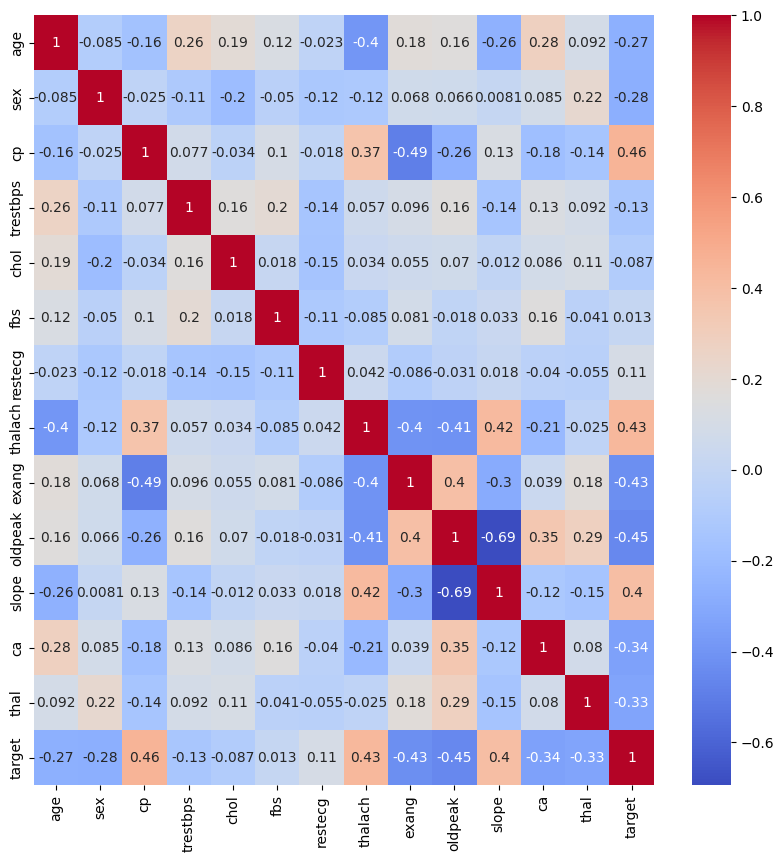

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(dfhrt2.corr(), cmap = 'coolwarm', annot = True)
plt.show()

### Checking For the Distribution of the Dataset Using Histogram

### Visualize Distributions of Numeric Features

<Figure size 800x800 with 0 Axes>

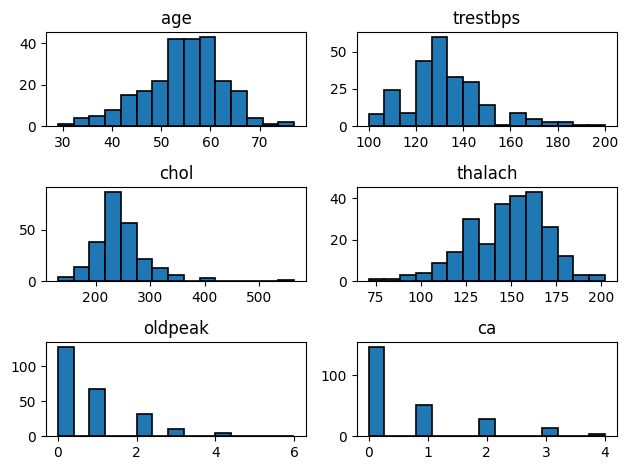

In [ ]:
# Visualize distributions of numeric features
plt.figure(figsize=(8, 8))
dfhrt2.hist(bins=15, edgecolor='black', linewidth=1.2, grid=False)
plt.tight_layout()
plt.show()

### Distibution of the Target Feature Amongst the Unique Values

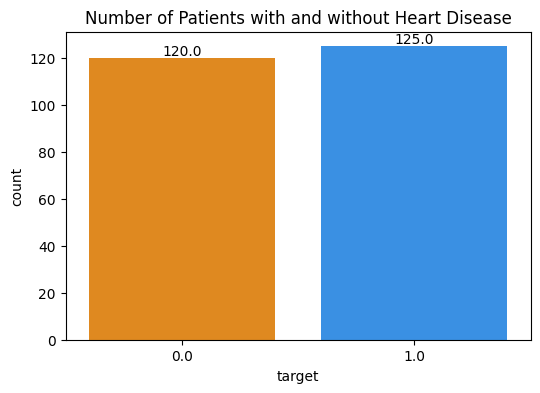

In [ ]:
# Visualize target variable distribution
plt.figure(figsize=(6, 4))
sns.countplot(x="target", data=dfhrt2, palette=["darkorange", "dodgerblue"])

plt.title('Number of Patients with and without Heart Disease')

# Label the count on each bar
for i, bar in enumerate(plt.gca().patches):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(),
             str(bar.get_height()), ha="center", va="bottom")

plt.show()

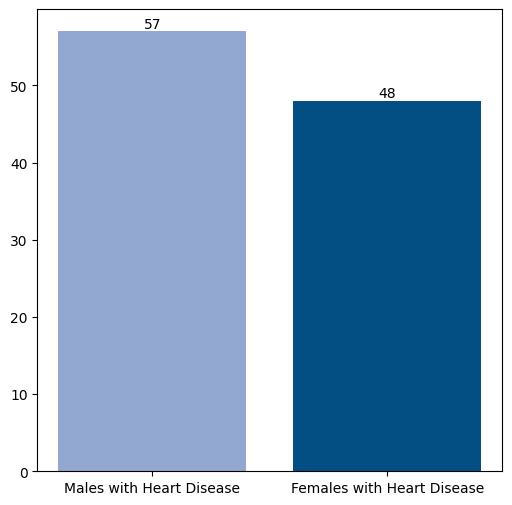

In [ ]:
# Count individuals with heart disease for each sex
plt.figure(figsize=(6, 6))
males_with_heart_disease = len(dfhrt2[(dfhrt2['sex'] == 1) & (dfhrt2['target'] == 1)])
females_with_heart_disease = len(dfhrt2[(dfhrt2['sex'] == 0) & (dfhrt2['target'] == 1)])

# Create a bar chart with different colors for males and females
plt.bar('Males with Heart Disease', males_with_heart_disease, color='#92a8d1')
plt.bar('Females with Heart Disease', females_with_heart_disease, color='#034f84')


# Label the count on each bar
for i, bar in enumerate(plt.gca().patches):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(),
             str(bar.get_height()), ha="center", va="bottom")

plt.show()

### Visualize Relationships Between Numeric Features and Target Features

<Figure size 1400x1000 with 0 Axes>

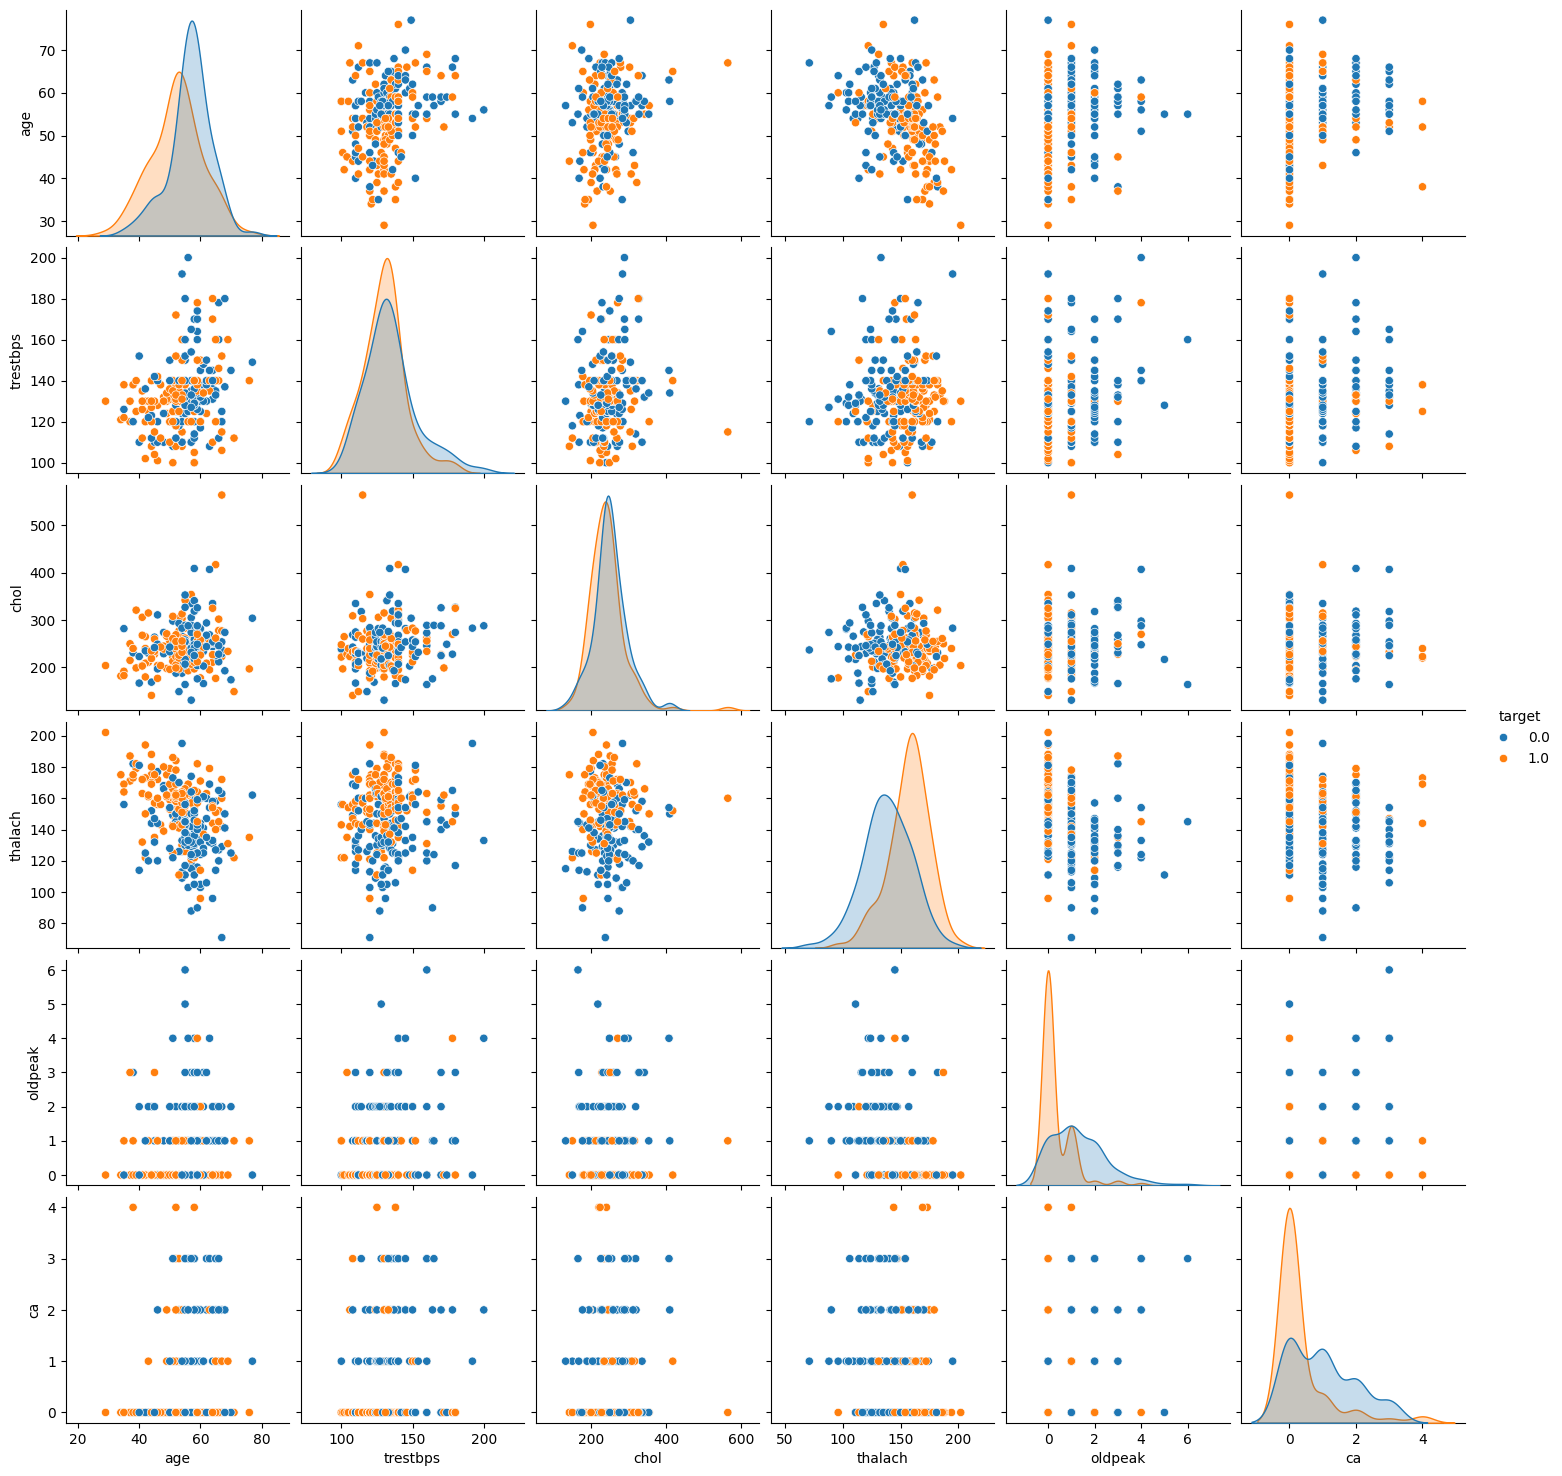

In [ ]:
# Visualize relationships between numeric features and target variable
plt.figure(figsize=(14, 10))
sns.pairplot(dfhrt2, hue='target')
plt.show()

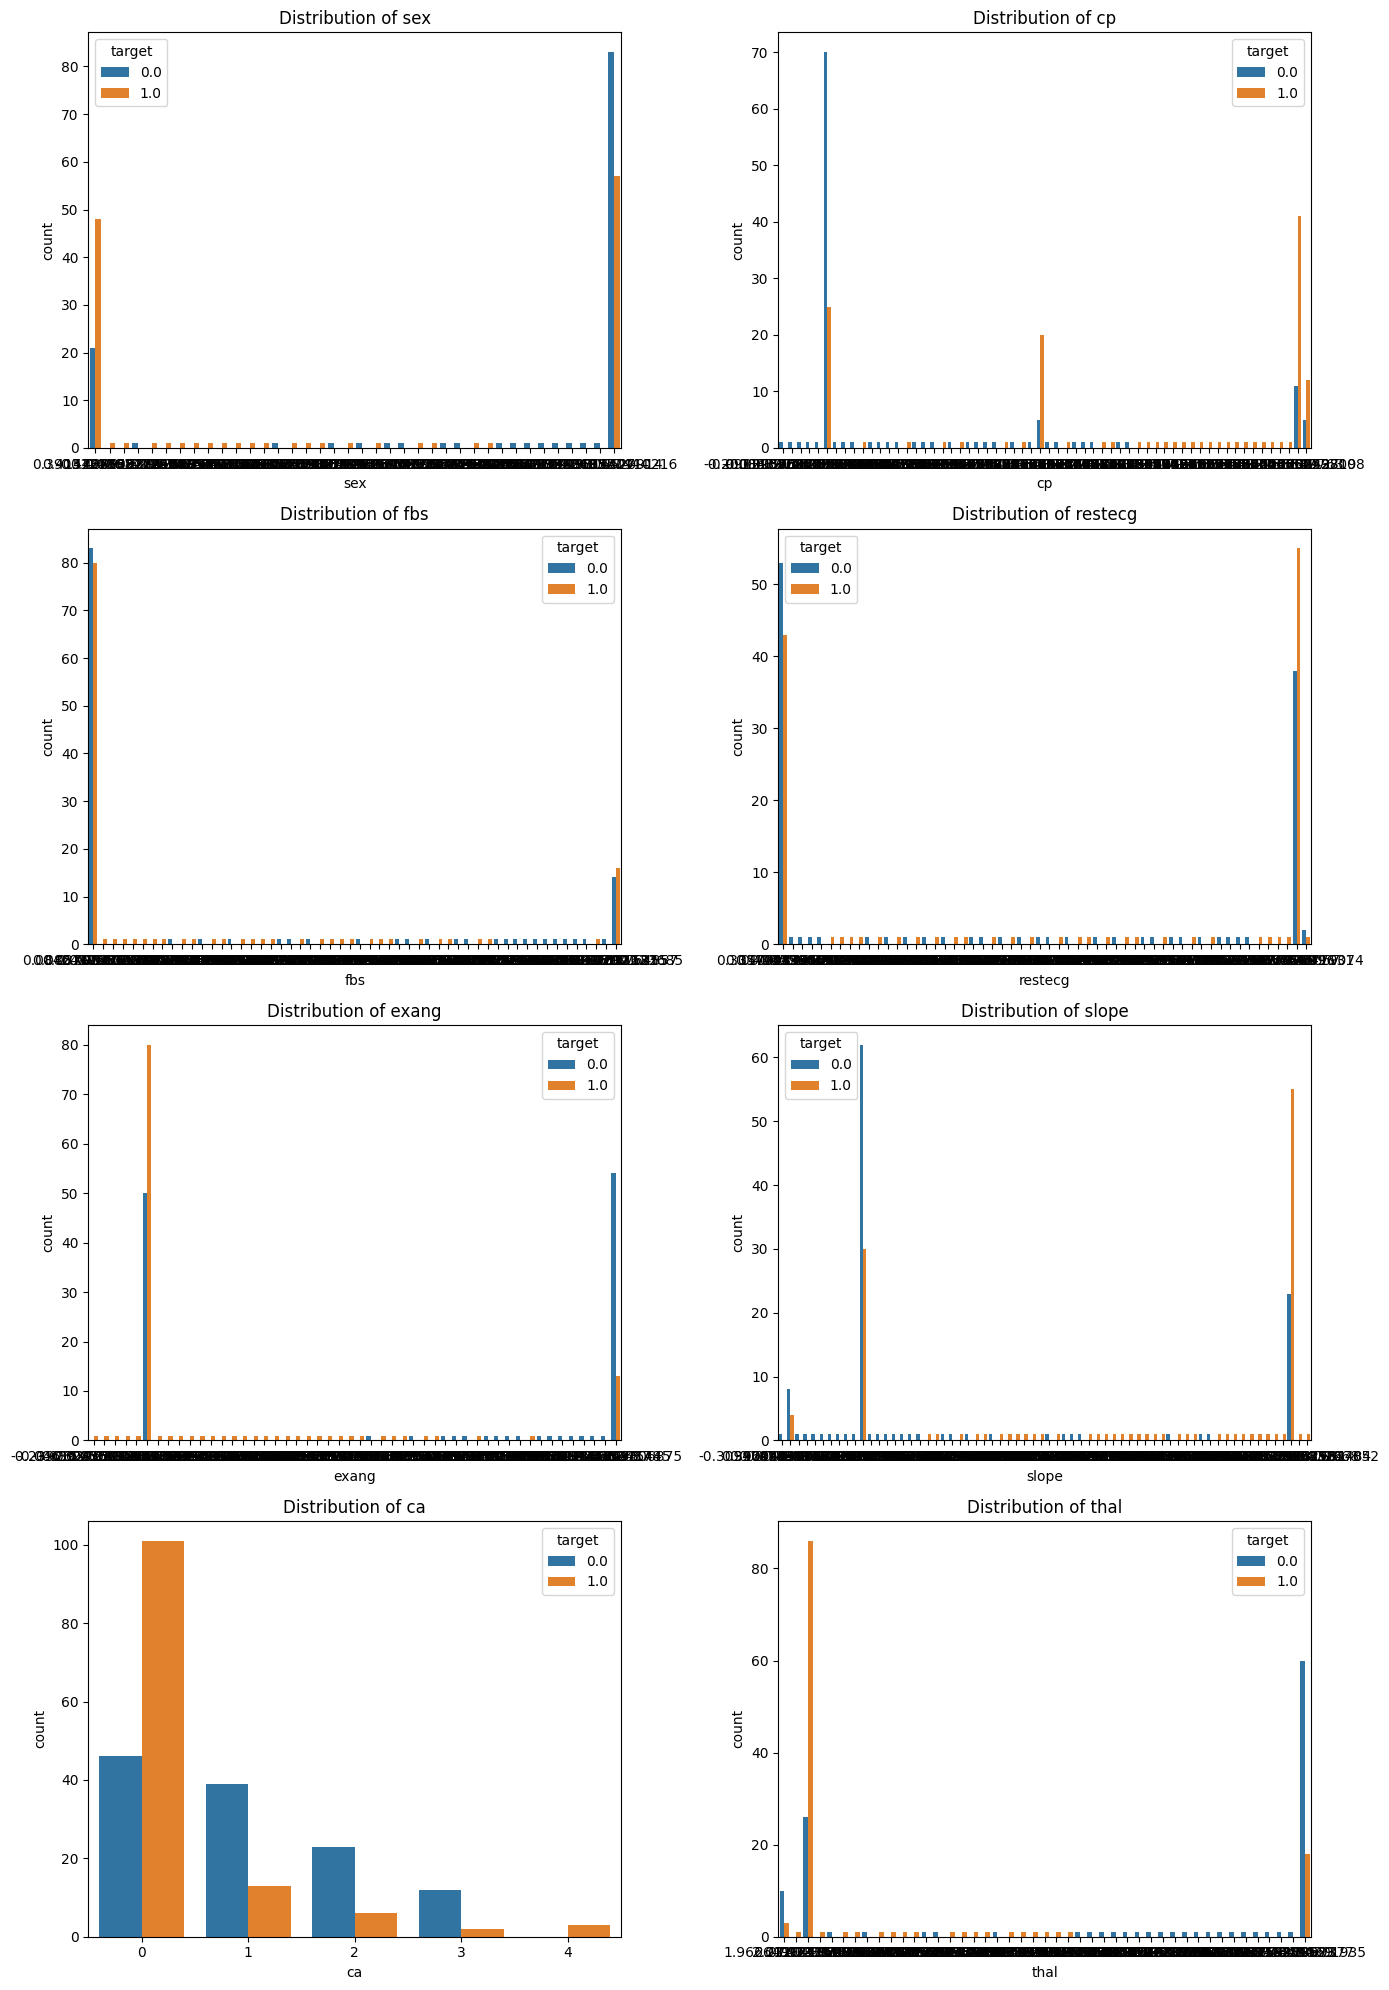

In [ ]:
# Visualize categorical variables
categorical_vars = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
fig, axs = plt.subplots(nrows=4, ncols=2, figsize=(14, 20))

for ax, var in zip(axs.flat, categorical_vars):
    sns.countplot(x=var, hue='target', data=dfhrt2, ax=ax)
    ax.set_title(f'Distribution of {var}')
    ax.legend(title='target')

plt.tight_layout()
plt.show()


### Checking for Outliers

From the dataset we can see that some features contains outliers (that are extremely far points from the mean), to treat this I would use zscore for the treatment of the outlier with a zscore value set to be equal to 3


In [ ]:
def boxPlot(dfhrt1, figsize=(10, 10)):
    plt.figure(figsize=figsize)
    dfhrt1.boxplot()
    plt.title('Box Plot for Heart Disease')
    plt.xlabel('Columns')
    plt.ylabel('Values')
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
    plt.grid(False)
    plt.show()


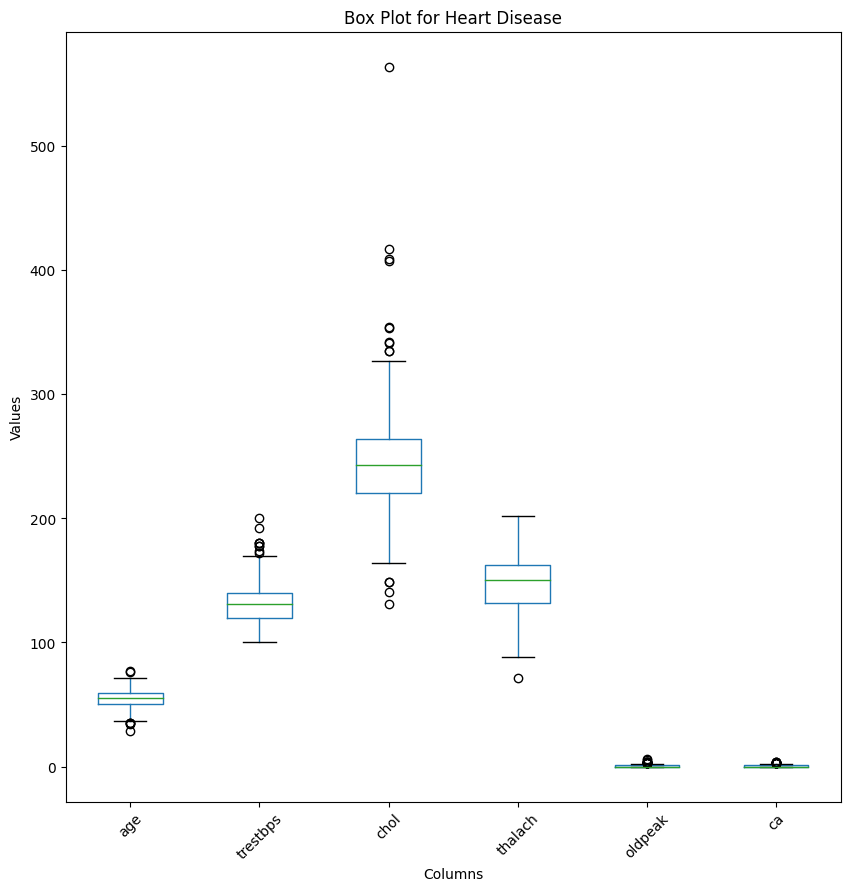

In [ ]:
boxPlot(dfhrt2)

### Detection of Outliers

In [ ]:
numerical_vars=dfhrt2.select_dtypes('int32').columns
print(numerical_vars)
categorical_vars=dfhrt2.select_dtypes('category').columns
print(categorical_vars)

Index(['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'ca'], dtype='object')
Index(['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal', 'target'], dtype='object')


In [ ]:
def outlier_lims(col):
    q3,q1 = np.percentile(col, [75,25])
    iqr = q3-q1
    upper_lim = q3 + 1.5*iqr
    lower_lim = q1 - 1.5*iqr
    return upper_lim, lower_lim

In [ ]:
for col in numerical_vars:
    print("--------------------------------------------------")
    print("Column:", col)

    UL,LL = outlier_lims(dfhrt2[col])
    print("Upper Limit =", UL)
    print("Lower Limit =", LL)

    total_outliers = len(dfhrt2.loc[dfhrt2[col]<LL,col]) + len(dfhrt2.loc[dfhrt2[col]>UL,col])
    percent = (total_outliers / len(dfhrt2.index) )*100

    print("Percentage of Outliers=", percent)
    print("-------------------------------------------------- \n")

--------------------------------------------------
Column: age
Upper Limit = 72.5
Lower Limit = 36.5
Percentage of Outliers= 2.857142857142857
-------------------------------------------------- 

--------------------------------------------------
Column: trestbps
Upper Limit = 170.0
Lower Limit = 90.0
Percentage of Outliers= 3.6734693877551026
-------------------------------------------------- 

--------------------------------------------------
Column: chol
Upper Limit = 330.0
Lower Limit = 154.0
Percentage of Outliers= 5.714285714285714
-------------------------------------------------- 

--------------------------------------------------
Column: thalach
Upper Limit = 207.0
Lower Limit = 87.0
Percentage of Outliers= 0.40816326530612246
-------------------------------------------------- 

--------------------------------------------------
Column: oldpeak
Upper Limit = 2.5
Lower Limit = -1.5
Percentage of Outliers= 7.346938775510205
-------------------------------------------------- 



In [ ]:
dfhrt2.shape

(245, 14)

In [ ]:
zscores = np.abs(zscore(dfhrt2[['age','trestbps','chol','thalach','oldpeak','ca']]))
filtered_entries = (zscores <3).all(axis=1)
dfhrt2 = dfhrt2[filtered_entries]

In [ ]:
dfhrt2.head()

age       sex        cp  trestbps  chol  fbs   restecg  thalach     exang  \
0   39  0.000000  2.000000       125   199  0.0  1.000000      179  0.000000   
1   58  0.867138  0.000000       100   239  0.0  0.579773      156  0.000000   
2   51  0.629066  0.570217       100   222  0.0  1.000000      143  1.000000   
3   58  0.000000  0.732433       100   248  0.0  0.000000      122  0.369254   
4   46  1.000000  1.000000       101   197  1.0  1.000000      156  0.214637   

   oldpeak     slope  ca      thal target  
0        0  1.802569   0  2.031049    1.0  
1        0  2.000000   1  3.000000    0.0  
2        1  1.000000   0  2.000000    1.0  
3        1  1.000000   0  2.000000    1.0  
4        0  2.000000   0  3.000000    1.0

In [ ]:
dfhrt2.shape

(232, 14)

In [ ]:
def boxPlot(dfhrt2, figsize=(10, 10)):
    plt.figure(figsize=figsize)
    dfhrt2.boxplot()
    plt.title('Box Plot for Heart Disease')
    plt.xlabel('Columns')
    plt.ylabel('Values')
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
    plt.grid(False)
    plt.show()

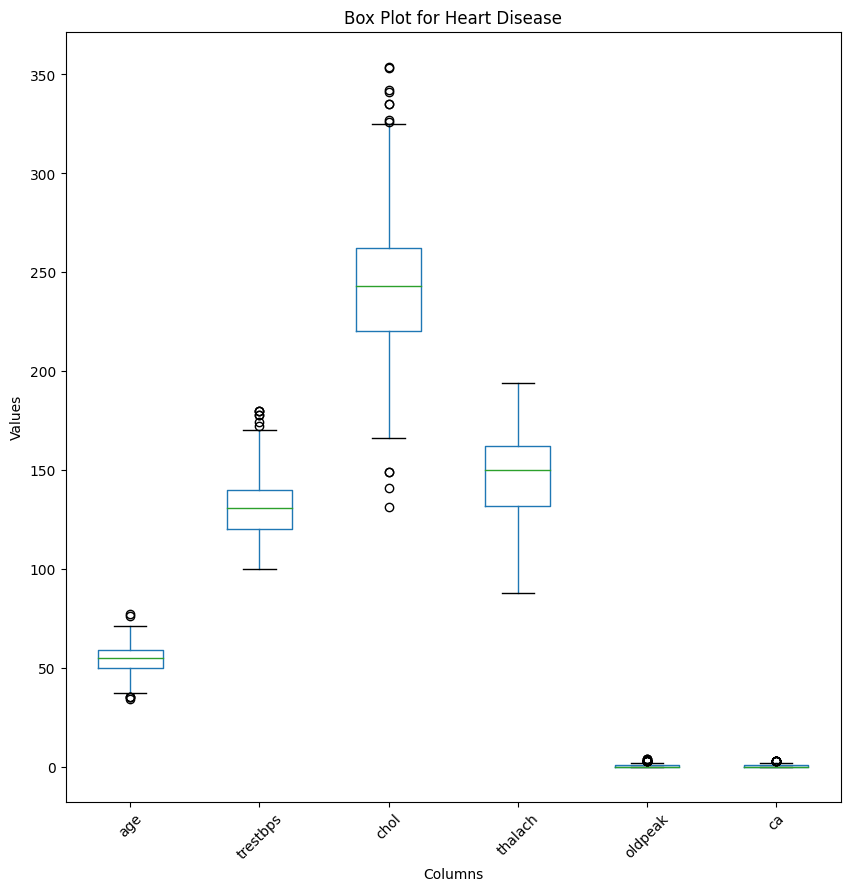

In [ ]:
boxPlot(dfhrt2)

### Verifying the Number of Rows Retained After Taking Care of the Outliers

In [ ]:
dfhrt2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 232 entries, 0 to 242
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   age       232 non-null    int32   
 1   sex       232 non-null    category
 2   cp        232 non-null    category
 3   trestbps  232 non-null    int32   
 4   chol      232 non-null    int32   
 5   fbs       232 non-null    category
 6   restecg   232 non-null    category
 7   thalach   232 non-null    int32   
 8   exang     232 non-null    category
 9   oldpeak   232 non-null    int32   
 10  slope     232 non-null    category
 11  ca        232 non-null    int32   
 12  thal      232 non-null    category
 13  target    232 non-null    category
dtypes: category(8), int32(6)
memory usage: 24.4 KB


##Checking and Removing Duplicate

In [ ]:
duplicate_rows =dfhrt2[dfhrt2.duplicated()]

# Print the number of duplicate rows
print(f"Number of duplicate rows: {len(duplicate_rows)}")


Number of duplicate rows: 0


### Task 2: Feature Preprocessing and Transformation

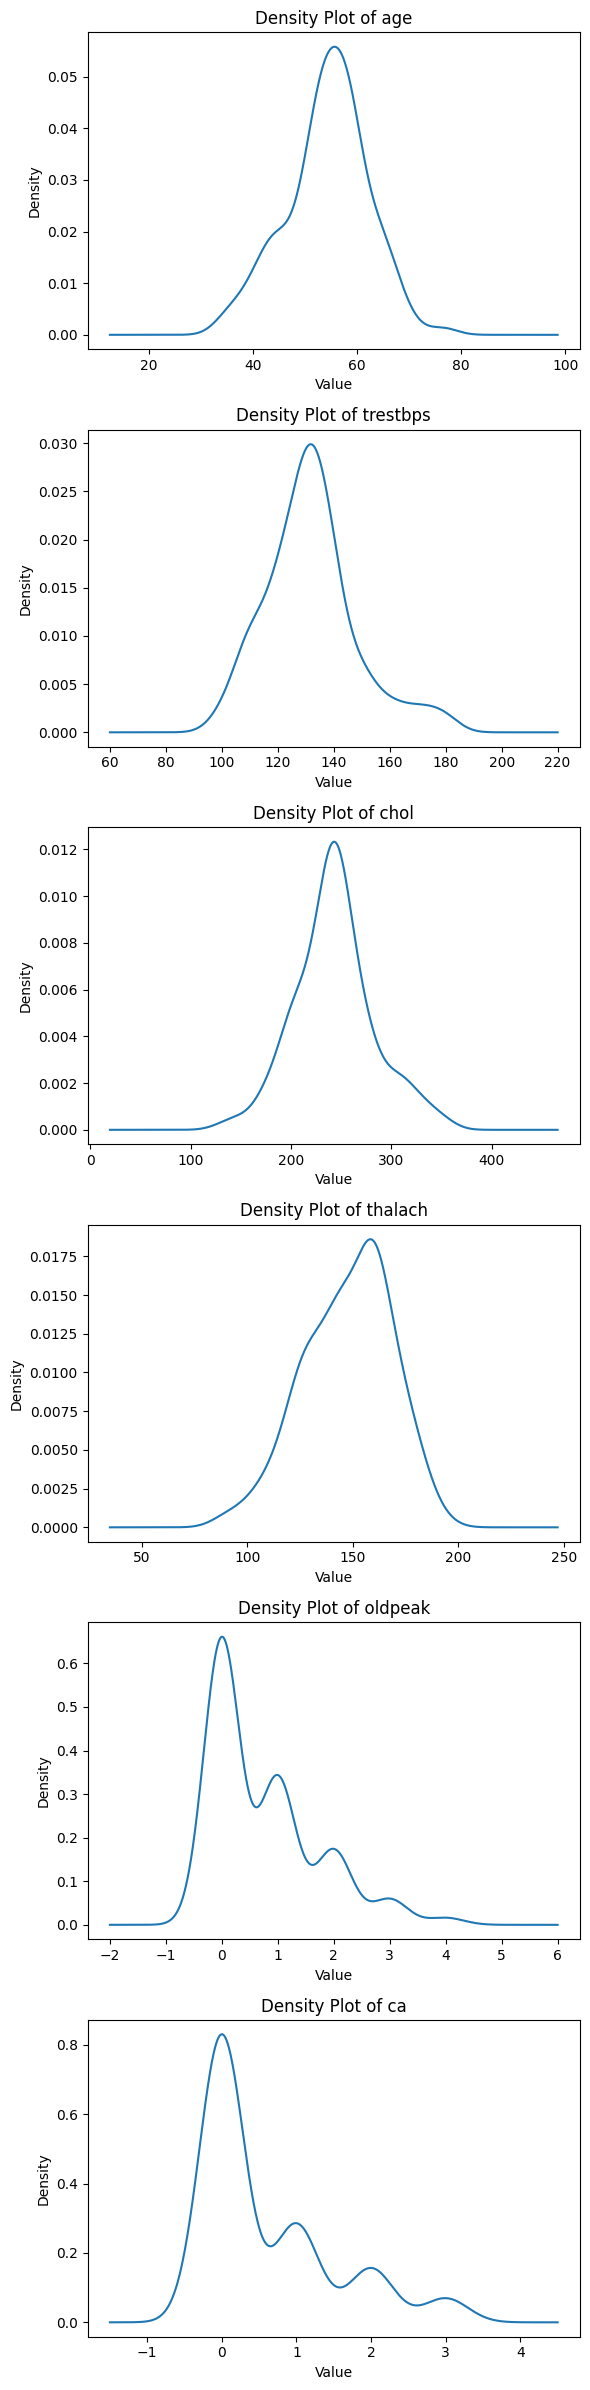

In [ ]:
# Plot density plot for all numerical columns
numerical_columns = dfhrt2.select_dtypes(include=['float64', 'int32']).columns

fig, axes = plt.subplots(nrows=len(numerical_columns), figsize=(6, 4*len(numerical_columns)))

for idx, col in enumerate(numerical_columns):
    dfhrt2[col].plot(kind='density', ax=axes[idx], title=f'Density Plot of {col}')
    axes[idx].set_xlabel('Value')
    axes[idx].set_ylabel('Density')

plt.tight_layout()
plt.show()

### Rescaling the Dataset

In [ ]:
predictors_df2 = dfhrt2.drop(columns='target')
target_df2 = dfhrt2['target']

In [ ]:
print(predictors_df2.shape, target_df2.shape)

(232, 13) (232,)


In [ ]:
predictors_dfArr2=predictors_df2.values
predictors_dfArr2

array([[39.        ,  0.        ,  2.        , ...,  1.80256853,
         0.        ,  2.03104899],
       [58.        ,  0.8671384 ,  0.        , ...,  2.        ,
         1.        ,  3.        ],
       [51.        ,  0.62906585,  0.57021669, ...,  1.        ,
         0.        ,  2.        ],
       ...,
       [68.        ,  1.        ,  2.        , ...,  1.        ,
         0.        ,  3.        ],
       [55.        ,  0.        ,  0.        , ...,  1.        ,
         0.        ,  2.        ],
       [64.        ,  0.        ,  0.        , ...,  2.        ,
         0.        ,  2.        ]])

In [ ]:
X1= predictors_dfArr2[:, 0:13]
X1

array([[39.        ,  0.        ,  2.        , ...,  1.80256853,
         0.        ,  2.03104899],
       [58.        ,  0.8671384 ,  0.        , ...,  2.        ,
         1.        ,  3.        ],
       [51.        ,  0.62906585,  0.57021669, ...,  1.        ,
         0.        ,  2.        ],
       ...,
       [68.        ,  1.        ,  2.        , ...,  1.        ,
         0.        ,  3.        ],
       [55.        ,  0.        ,  0.        , ...,  1.        ,
         0.        ,  2.        ],
       [64.        ,  0.        ,  0.        , ...,  2.        ,
         0.        ,  2.        ]])

In [ ]:
scaler1 = MinMaxScaler(feature_range=(0, 1)) #Calling the constructor of the MinMaxScaler Class. Specify range
rescaledX1 = scaler1.fit_transform(X1)
# summarize transformed data
set_printoptions(precision=1)
rescaledX1

array([[0.1, 0. , 0.7, ..., 0.8, 0. , 0.5],
       [0.6, 0.9, 0.1, ..., 0.9, 0.3, 1. ],
       [0.4, 0.6, 0.2, ..., 0.5, 0. , 0.5],
       ...,
       [0.8, 1. , 0.7, ..., 0.5, 0. , 1. ],
       [0.5, 0. , 0.1, ..., 0.5, 0. , 0.5],
       [0.7, 0. , 0.1, ..., 0.9, 0. , 0.5]])

In [ ]:
col1= list(predictors_df2.columns)
# converting the rescaled X to a dataframe and adding back Y

rescaledXDF1 = pd.DataFrame(rescaledX1, columns =[col1])
# adding back the outcome column

rescaledXDF1

age       sex        cp trestbps      chol  fbs   restecg   thalach  \
0    0.116279  0.000000  0.687509   0.3125  0.304933  0.0  0.500000  0.858491   
1    0.558140  0.867138  0.062526   0.0000  0.484305  0.0  0.289886  0.641509   
2    0.395349  0.629066  0.240714   0.0000  0.408072  0.0  0.500000  0.518868   
3    0.558140  0.000000  0.291405   0.0000  0.524664  0.0  0.000000  0.320755   
4    0.279070  1.000000  0.375017   0.0125  0.295964  1.0  0.500000  0.641509   
..        ...       ...       ...      ...       ...  ...       ...       ...   
227  0.744186  0.000000  0.062526   0.9750  0.434978  1.0  0.500000  0.726415   
228  0.581395  1.000000  1.000000   0.9750  0.623318  0.0  0.000000  0.537736   
229  0.790698  1.000000  0.687509   1.0000  0.641256  1.0  0.000000  0.584906   
230  0.488372  0.000000  0.062526   1.0000  0.878924  0.0  1.000000  0.273585   
231  0.697674  0.000000  0.062526   1.0000  0.869955  0.0  0.500000  0.622642   

        exang oldpeak     slope        ca      thal  
0    0.044118    0.00  0.847945  0.000000  0.515524  
1    0.044118    0.00  0.940819  0.333333  1.000000  
2    1.000000    0.25  0.470409  0.000000  0.500000  
3    0.397082    0.25  0.470409  0.000000  0.500000  
4    0.249286    0.00  0.940819  0.000000  1.000000  
..        ...     ...       ...       ...       ...  
227  1.000000    0.25  0.470409  0.666667  1.000000  
228  0.044118    1.00  0.000000  0.000000  1.000000  
229  1.000000    0.25  0.470409  0.000000  1.000000  
230  1.000000    0.75  0.470409  0.000000  0.500000  
231  1.000000    0.00  0.940819  0.000000  0.500000  

[232 rows x 13 columns]

In [ ]:
rescaledXDF1.describe()

age         sex          cp    trestbps        chol         fbs  \
count  232.000000  232.000000  232.000000  232.000000  232.000000  232.000000   
mean     0.472434    0.680331    0.358862    0.398006    0.502088    0.152164   
std      0.182284    0.434792    0.306532    0.201890    0.176292    0.320823   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.372093    0.000000    0.062526    0.250000    0.399103    0.000000   
50%      0.488372    1.000000    0.362105    0.381250    0.502242    0.000000   
75%      0.581395    1.000000    0.687509    0.500000    0.587444    0.129190   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  232.000000  232.000000  232.000000  232.000000  232.000000  232.000000   
mean     0.258452    0.562622    0.372266    0.185345    0.656128    0.199713   
std      0.236302    0.195835    0.420587    0.238639    0.259132    0.295647   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.415094    0.044118    0.000000    0.470409    0.000000   
50%      0.264536    0.584906    0.044118    0.000000    0.638216    0.000000   
75%      0.500000    0.698113    1.000000    0.250000    0.940819    0.333333   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

             thal  
count  232.000000  
mean     0.652059  
std      0.270679  
min      0.000000  
25%      0.500000  
50%      0.500000  
75%      1.000000  
max      1.000000

## Standardizing the Dataset

In [ ]:
#STANDARDIZING THE DATASET
#Standardizing was done to generate a uniform standard deviation for all the features
scaler1 = StandardScaler()
standardized_df1 = pd.DataFrame(scaler1.fit_transform(rescaledXDF1), columns= rescaledXDF1.columns)
standardized_df1.head()

age       sex        cp  trestbps      chol       fbs   restecg  \
0 -1.958073 -1.568111  1.074461 -0.424445 -1.120763 -0.475320  1.024408   
1  0.471194  0.430578 -0.968828 -1.975663 -0.101088 -0.475320  0.133313   
2 -0.423799 -0.118162 -0.386269 -1.975663 -0.534450 -0.475320  1.024408   
3  0.471194 -1.568111 -0.220541 -1.975663  0.128338 -0.475320 -1.096101   
4 -1.063080  0.736814  0.052817 -1.913614 -1.171747  2.648406  1.024408   

    thalach     exang   oldpeak     slope        ca      thal  
0  1.514072 -0.781900 -0.778352  0.741830 -0.676970 -0.505503  
1  0.403697 -0.781900 -0.778352  1.101008  0.452937  1.288217  
2 -0.223906  1.495746  0.271518 -0.718246 -0.676970 -0.562981  
3 -1.237726  0.059131  0.271518 -0.718246 -0.676970 -0.562981  
4  0.403697 -0.293032 -0.778352  1.101008 -0.676970  1.288217

In [ ]:
standardized_df1.describe()

age           sex            cp      trestbps          chol  \
count  2.320000e+02  2.320000e+02  2.320000e+02  2.320000e+02  2.320000e+02   
mean  -6.125368e-17 -1.301641e-16 -1.761043e-16  1.225074e-16 -5.972234e-16   
std    1.002162e+00  1.002162e+00  1.002162e+00  1.002162e+00  1.002162e+00   
min   -2.597354e+00 -1.568111e+00 -1.173247e+00 -1.975663e+00 -2.854209e+00   
25%   -5.516553e-01 -1.568111e+00 -9.688284e-01 -7.346887e-01 -5.854338e-01   
50%    8.762557e-02  7.368140e-01  1.060312e-02 -8.317735e-02  8.790297e-04   
75%    5.990503e-01  7.368140e-01  1.074461e+00  5.062853e-01  4.852244e-01   
max    2.900462e+00  7.368140e-01  2.096106e+00  2.988233e+00  2.830476e+00   

                fbs       restecg       thalach         exang       oldpeak  \
count  2.320000e+02  2.320000e+02  2.320000e+02  2.320000e+02  2.320000e+02   
mean  -4.594026e-17 -3.062684e-17  3.828355e-17 -7.273875e-17 -5.359697e-17   
std    1.002162e+00  1.002162e+00  1.002162e+00  1.002162e+00  1.002162e+00   
min   -4.753200e-01 -1.096101e+00 -2.879150e+00 -8.870235e-01 -7.783523e-01   
25%   -4.753200e-01 -1.096101e+00 -7.549549e-01 -7.818998e-01 -7.783523e-01   
50%   -4.753200e-01  2.579910e-02  1.140340e-01 -7.818998e-01 -7.783523e-01   
75%   -7.176707e-02  1.024408e+00  6.933599e-01  1.495746e+00  2.715182e-01   
max    2.648406e+00  3.144917e+00  2.238229e+00  1.495746e+00  3.421130e+00   

              slope            ca          thal  
count  2.320000e+02  2.320000e+02  2.320000e+02  
mean   3.828355e-16  4.594026e-17 -6.508204e-17  
std    1.002162e+00  1.002162e+00  1.002162e+00  
min   -2.537499e+00 -6.769704e-01 -2.414179e+00  
25%   -7.182455e-01 -6.769704e-01 -5.629811e-01  
50%   -6.927273e-02 -6.769704e-01 -5.629811e-01  
75%    1.101008e+00  4.529370e-01  1.288217e+00  
max    1.329884e+00  2.712752e+00  1.288217e+00

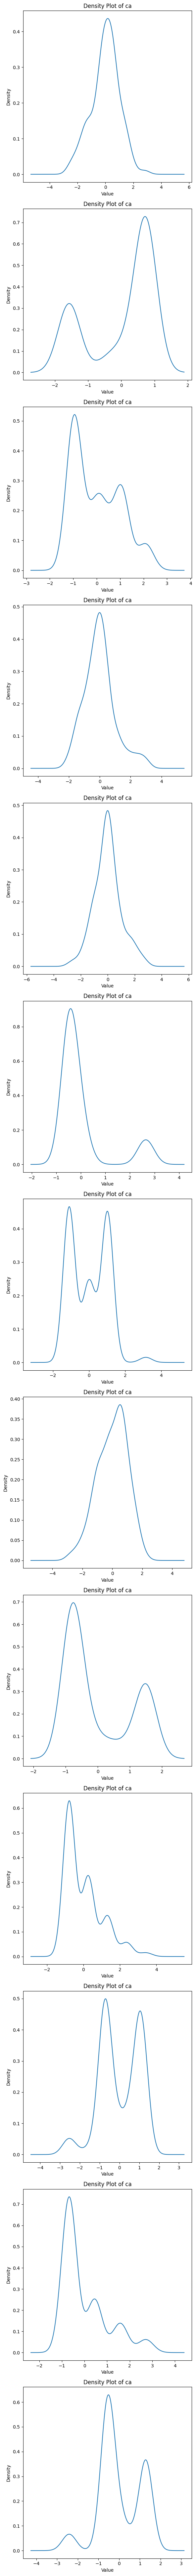

In [ ]:
# Plot density plot for all numerical columns
numerical_columns1 = standardized_df1.select_dtypes(include=['float64', 'int64']).columns

fig, axes = plt.subplots(nrows=len(numerical_columns1), figsize=(6, 6*len(numerical_columns1)))

for idx, col1 in enumerate(numerical_columns1):
    standardized_df1[col1].plot(kind='density', ax=axes[idx], title=f'Density Plot of {col}')
    axes[idx].set_xlabel('Value')
    axes[idx].set_ylabel('Density')

plt.tight_layout()
plt.show()

### Normalisation on Rescaled and Standardised Dataset

In [ ]:
#NORMALIZATION on Rescaled and Standardized data
#From the visualization of the distribution using histogram it can be seen that some features in the dataset were not normal
#Therefore normalization was done to remove skewness from the dataset

standardized_df1.dropna()
###
# Now you can apply the Normalizer
scaler1 = Normalizer()
normalized_df1 = pd.DataFrame(scaler1.fit_transform(standardized_df1), columns=standardized_df1.columns)
normalized_df1.head()

age       sex        cp  trestbps      chol       fbs   restecg  \
0 -0.506708 -0.405794  0.278048 -0.109837 -0.290030 -0.123003  0.265095   
1  0.149302  0.136432 -0.306981 -0.626005 -0.032031 -0.150609  0.042241   
2 -0.137795 -0.038419 -0.125592 -0.642370 -0.173772 -0.154546  0.333078   
3  0.142219 -0.473298 -0.066565 -0.596308  0.038736 -0.143464 -0.330833   
4 -0.244152  0.169220  0.012130 -0.439489 -0.269108  0.608245  0.235270   

    thalach     exang   oldpeak     slope        ca      thal  
0  0.391810 -0.202339 -0.201421  0.191970 -0.175186 -0.130814  
1  0.127915 -0.247751 -0.246627  0.348863  0.143517  0.408182  
2 -0.072801  0.486329  0.088282 -0.233531 -0.220111 -0.183049  
3 -0.373579  0.017847  0.081951 -0.216786 -0.204328 -0.169923  
4  0.092715 -0.067299 -0.178760  0.252862 -0.155476  0.295858

In [ ]:
normalized_df1.describe()

age         sex          cp    trestbps        chol         fbs  \
count  232.000000  232.000000  232.000000  232.000000  232.000000  232.000000   
mean    -0.009338    0.008020   -0.001060   -0.018302   -0.003976   -0.027419   
std      0.275269    0.296490    0.288185    0.263831    0.268783    0.243469   
min     -0.684948   -0.608356   -0.479946   -0.642370   -0.665700   -0.243266   
25%     -0.187342   -0.309368   -0.259280   -0.184761   -0.196183   -0.153524   
50%      0.023423    0.164496    0.004453   -0.024069    0.000249   -0.124307   
75%      0.164486    0.225139    0.268671    0.130921    0.141581   -0.023755   
max      0.671155    0.403967    0.649107    0.652297    0.730691    0.741378   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  232.000000  232.000000  232.000000  232.000000  232.000000  232.000000   
mean     0.002858    0.016199   -0.020489   -0.026390    0.021283   -0.022369   
std      0.292127    0.279169    0.289526    0.267907    0.285241    0.270094   
min     -0.528054   -0.744516   -0.392064   -0.426741   -0.663090   -0.371157   
25%     -0.286637   -0.195112   -0.247393   -0.243346   -0.217814   -0.217550   
50%      0.007859    0.045597   -0.177048   -0.173535   -0.019719   -0.172465   
75%      0.286147    0.239342    0.291230    0.096095    0.304469    0.146583   
max      0.651401    0.598759    0.628126    0.697853    0.524968    0.761197   

             thal  
count  232.000000  
mean     0.001274  
std      0.282263  
min     -0.693138  
25%     -0.178872  
50%     -0.122174  
75%      0.296811  
max      0.568712

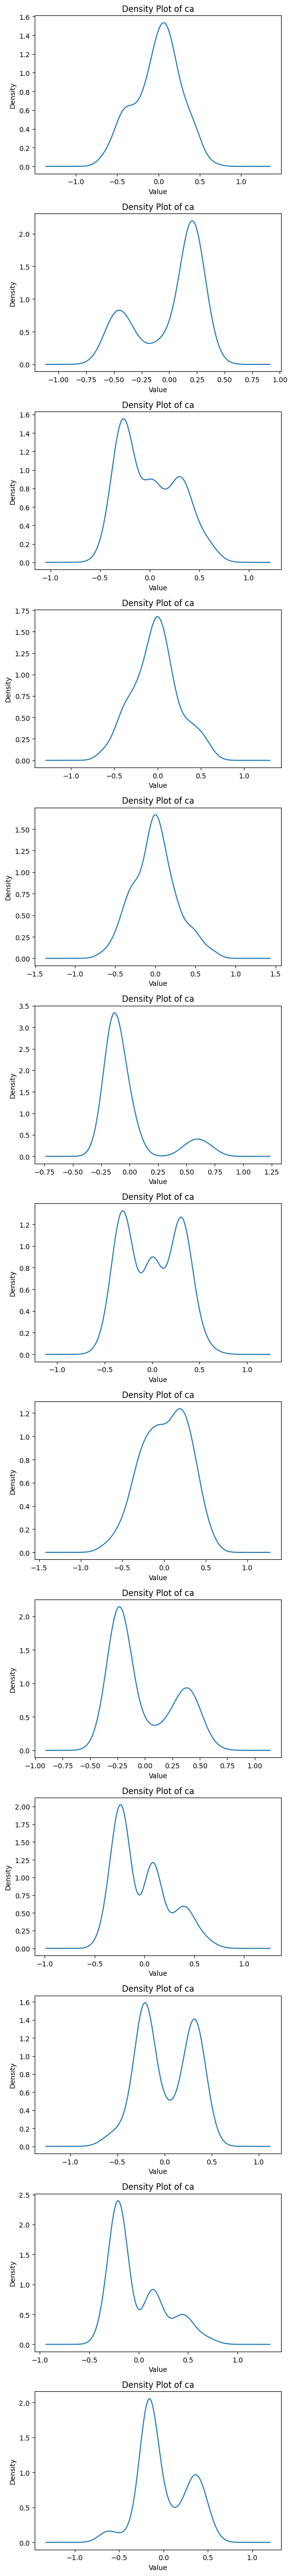

In [ ]:
# Plot density plot for all numerical columns
numerical_columns1 = normalized_df1.select_dtypes(include=['float64', 'int64']).columns

fig, axes = plt.subplots(nrows=len(numerical_columns1), figsize=(6, 4*len(numerical_columns1)))

for idx, col1 in enumerate(numerical_columns1):
    normalized_df1[col1].plot(kind='density', ax=axes[idx], title=f'Density Plot of {col}')
    axes[idx].set_xlabel('Value')
    axes[idx].set_ylabel('Density')

plt.tight_layout()
plt.show()

### Task 3: Feature Selection- RFE Technique

In [ ]:
predictors_dfArr1=normalized_df1.values
X1= predictors_dfArr1[:, 0:13]

### Mediating and Moderating Effects

In [ ]:
predictors_df1 = dfhrt2.drop(columns='target')
target_df1 = dfhrt2['target']

In [ ]:
Y1= target_df1.values
Y1=Y1[:,]
Y1 = Y1.astype(int)
Y1

array([1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1])

In [ ]:
len(Y1)

232

In [ ]:
len(X1)

232

### n_features_to_select=13

In [ ]:
X1 = predictors_df1.values
Y1

model = LogisticRegression(max_iter=500)
model.fit(X1,Y1)
model.score(X1,Y1)

0.8491379310344828

### n_features_to_select=6

In [ ]:
# Now you can proceed with RFE
model = LogisticRegression()
rfe = RFE(model, n_features_to_select=6)
fit = rfe.fit(X1, Y1)
print(fit.support_)
print(fit.ranking_)

[False  True  True False False False False False  True False  True  True
  True]
[7 1 1 6 8 2 3 5 1 4 1 1 1]


In [ ]:
normalized_df1.columns

MultiIndex([(     'age',),
            (     'sex',),
            (      'cp',),
            ('trestbps',),
            (    'chol',),
            (     'fbs',),
            ( 'restecg',),
            ( 'thalach',),
            (   'exang',),
            ( 'oldpeak',),
            (   'slope',),
            (      'ca',),
            (    'thal',)],
           )

In [ ]:
Select_col1=['sex','cp','thalach', 'slope', 'ca','thal']
X1 = predictors_df1[Select_col1].values
Y1

model = LogisticRegression(max_iter=500)
model.fit(X1,Y1)
model.score(X1,Y1)

0.8232758620689655

### n_features_to_select=5

In [ ]:
# Now you can proceed with RFE
predictors_dfArr1=normalized_df1.values
X1= predictors_dfArr1[:, 0:13]
Y1
model = LogisticRegression()
rfe = RFE(model, n_features_to_select=5)
fit = rfe.fit(X1, Y1)
print(fit.support_)
print(fit.ranking_)

[False  True  True False False False False False False False  True  True
  True]
[8 1 1 6 4 7 9 2 5 3 1 1 1]


In [ ]:
Select_col2=['sex','cp','slope', 'ca','thal']
X1 = predictors_df1[Select_col2].values
Y1

model = LogisticRegression(max_iter=500)
model.fit(X1,Y1)
model.score(X1,Y1)

0.8232758620689655

## n_features_to_select=3

In [ ]:
# Now you can proceed with RFE
predictors_dfArr1=normalized_df1.values
X1= predictors_dfArr1[:, 0:13]
Y1
model = LogisticRegression()
rfe = RFE(model, n_features_to_select=3)
fit = rfe.fit(X1, Y1)
print(fit.support_)
print(fit.ranking_)

[False False  True False False False False False False False  True  True
 False]
[10  2  1  8  6  9 11  4  7  5  1  1  3]


In [ ]:
Select_col3=['cp', 'ca','thal']
X1 = predictors_df1[Select_col3].values
Y1

model = LogisticRegression(max_iter=500)
model.fit(X1,Y1)
model.score(X1,Y1)

0.7887931034482759

##TASK 4: Modelling

In [ ]:
X1 = predictors_df1.values
Y1

array([1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1])

### Spliting Dataset into Train and Test

In [ ]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(X1, Y1, test_size=0.3, random_state=42)

### Populating Various Models

In [ ]:
lr = LinearRegression()
dt = DecisionTreeRegressor()
gb = GradientBoostingRegressor()
rf = RandomForestRegressor()
xgb = XGBRegressor()
cbt = CatBoostRegressor()
logRegss = LogisticRegression(random_state=42)
lalgRegss= Lasso()
ridge = Ridge()

names = ['Linear Regression','DecisionTree','GradientBoosting','RandomForest','XGB','CATBOOST','logistic_model','Lasso','Rige']
models = {'Linear Regression':lr,'DecisionTree':dt,'GradientBoosting':gb,'RandomForest':rf,'XGB':xgb,'CATBOOST':cbt,'logistic_model':logRegss,'Lasso':lalgRegss,'Rige':ridge}

### Function to Iterate Through a List of Models and Generate Scores for Each Model

In [ ]:
def evaluate_models(models, x_train1, x_test1, y_train1, y_test1):
    np.random.seed(42)
    model_scores ={}
    for  name, model in models.items():
        model.fit(x_train1,y_train1)
        model_scores[name] = model.score(x_test1,y_test1)
    return model_scores

### Calling the Above Function

In [ ]:
scores1=evaluate_models(models= models, x_train1=x_train1, x_test1=x_test1, y_train1=y_train1, y_test1=y_test1)
scores1

Learning rate set to 0.03071
0:	learn: 0.4939810	total: 46.8ms	remaining: 46.8s
1:	learn: 0.4886976	total: 49.4ms	remaining: 24.7s
2:	learn: 0.4828916	total: 51.2ms	remaining: 17s
3:	learn: 0.4772991	total: 52.6ms	remaining: 13.1s
4:	learn: 0.4711289	total: 54.3ms	remaining: 10.8s
5:	learn: 0.4658795	total: 58.7ms	remaining: 9.72s
6:	learn: 0.4609986	total: 61.1ms	remaining: 8.67s
7:	learn: 0.4553616	total: 64.5ms	remaining: 8s
8:	learn: 0.4502225	total: 66.9ms	remaining: 7.37s
9:	learn: 0.4453771	total: 69.7ms	remaining: 6.9s
10:	learn: 0.4405143	total: 72.8ms	remaining: 6.55s
11:	learn: 0.4354317	total: 75.7ms	remaining: 6.23s
12:	learn: 0.4313682	total: 78.6ms	remaining: 5.97s
13:	learn: 0.4267182	total: 82.2ms	remaining: 5.79s
14:	learn: 0.4228052	total: 88.4ms	remaining: 5.8s
15:	learn: 0.4181556	total: 90ms	remaining: 5.53s
16:	learn: 0.4140759	total: 91.5ms	remaining: 5.29s
17:	learn: 0.4098087	total: 92.3ms	remaining: 5.04s
18:	learn: 0.4055116	total: 92.9ms	remaining: 4.8s
19:

{'Linear Regression': 0.4514228697385452,
 'DecisionTree': -0.04999999999999982,
 'GradientBoosting': 0.42373358349307255,
 'RandomForest': 0.45575,
 'XGB': 0.32992681313817485,
 'CATBOOST': 0.5461596019787858,
 'logistic_model': 0.8142857142857143,
 'Lasso': 0.18906964730756548,
 'Rige': 0.4540245744792062}

In [ ]:
df_model_scores1 = pd.DataFrame(scores1.items(), columns=['Model', 'Score'])
df_model_scores1['Score'] = (df_model_scores1['Score'] * 100).round(2)
df_model_scores1

Model  Score
0  Linear Regression  45.14
1       DecisionTree  -5.00
2   GradientBoosting  42.37
3       RandomForest  45.58
4                XGB  32.99
5           CATBOOST  54.62
6     logistic_model  81.43
7              Lasso  18.91
8               Rige  45.40

In [ ]:
from google.colab import files

# Save the data frame to a CSV file
df_model_scores1.to_csv('model_scores1.csv', index=False)

# Download the CSV file to your computer
files.download('model_scores1.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### Comparing Various Models with Their Respective R2_Score

<Figure size 1200x1200 with 0 Axes>

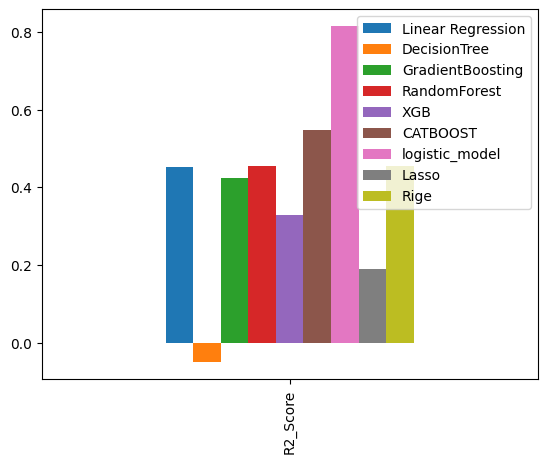

In [ ]:
compare1= pd.DataFrame(scores1, index=["R2_Score"])
# Set the figure size
plt.figure(figsize=(12, 12))

# Plot the bar chart
fig = compare1.plot.bar()
plt.savefig('heart_disease_plot.png')
# Increase the text size on the plot
plt.rc('axes', titlesize=15)     # fontsize of the axes title
plt.rc('axes', labelsize=15)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=15)    # fontsize of the x tick labels
plt.rc('ytick', labelsize=15)    # fontsize of the y tick labels
plt.rc('legend', fontsize=15)    # legend fontsize
plt.rc('figure', titlesize=15)  # fontsize of the figure title

# Show the plot
plt.show()

In [ ]:
from google.colab import files

# Download the image file
files.download('heart_disease_plot.png')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### Logistic_Model Came Out As the Best Performing Model

 ## TASK 5: Model Evaluation

### Evaluating the Model on the Previous Complete Dataset

In [ ]:
# Features and target variable
X = dfhrt2.drop('target', axis=1)
y = dfhrt2['target']

# Initialize k-fold cross-validation with k=5
kf = KFold(n_splits=5, shuffle=True, random_state=47)

# Initialize a model (Logistic Regression in this case)
model = LogisticRegression()

# Perform k-fold cross-validation
scores = cross_val_score(model, X, y, cv=kf, scoring='accuracy')

# Print the accuracy for each fold
print("Accuracy scores for each fold: ", scores)

# Print the mean accuracy and standard deviation
print("Mean accuracy: ", scores.mean())
print("Standard deviation: ", scores.std())


Accuracy scores for each fold:  [0.8 0.9 0.8 0.7 0.8]
Mean accuracy:  0.8187789084181313
Standard deviation:  0.06207925501653267


In [ ]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(X1, Y1, test_size=0.3, random_state=42)

In [ ]:
len(x_test1)

70

In [ ]:
logRegss.score(x_test1,y_test1)
y_pred= logRegss.predict(x_test1)
y_pred

array([0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1])

In [ ]:
len(y_pred)

70

In [ ]:
logRegss.score(x_test1,y_test1)

0.8142857142857143

In [ ]:
y_pred= logRegss.predict(x_test1)
y_pred

array([0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1])

In [ ]:
len(y_pred)

70

In [ ]:
logRegss = LogisticRegression(random_state=42)
logRegss.fit(x_train1, y_train1)
predicted_val = logRegss.predict(x_test1)
print('R^2 value: ', round(logRegss.score(x_test1,y_test1),3))
RMSE = np.sqrt(mean_squared_error(y_test1, predicted_val))
print('RMSE Value: ',round(RMSE,3))

R^2 value:  0.814
RMSE Value:  0.431


In [ ]:
mae= mean_absolute_error(y_test1, predicted_val)
mae

0.18571428571428572

In [ ]:
from sklearn.metrics import f1_score
f1 = f1_score(y_test1, y_pred)
f1


0.8433734939759036

In [ ]:
DF_pred=pd.DataFrame(data={'Actual_Y':y_test1, 'Predicted_Y':y_pred})

In [ ]:
DF_pred

Actual_Y  Predicted_Y
0          0            0
1          1            1
2          1            1
3          1            1
4          1            0
..       ...          ...
65         0            0
66         1            1
67         1            1
68         1            1
69         1            1

[70 rows x 2 columns]

### Confusion Matrix

In [ ]:
DF_pred.value_counts()

Actual_Y  Predicted_Y
1         1              35
0         0              22
          1               8
1         0               5
Name: count, dtype: int64

In [ ]:
# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test1, y_pred))

print("\nClassification Report:")
print(classification_report(y_test1, y_pred))

print("\nAccuracy Score:")
print(accuracy_score(y_test1, y_pred))

Confusion Matrix:
[[22  8]
 [ 5 35]]

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.73      0.77        30
           1       0.81      0.88      0.84        40

    accuracy                           0.81        70
   macro avg       0.81      0.80      0.81        70
weighted avg       0.81      0.81      0.81        70


Accuracy Score:
0.8142857142857143


### Summary

- **True Positives (TP):** 35 (actual 1, predicted 1)
- **True Negatives (TN):** 22 (actual 0, predicted 0)
- **False Positives (FP):** 8 (actual 0, predicted 1)
- **False Negatives (FN):** 5 (actual 1, predicted 0)


### Key Metrics:
1. **Precision:** The proportion of positive predictions that are actually correct.
   \[
   \text{Precision} = \frac{TP}{TP + FP} = \frac{35}{35 + 8} = \frac{35}{43} \approx 0.814
   \]

2. **Recall (Sensitivity or True Positive Rate):** The proportion of actual positives that are correctly identified.
   \[
   \text{Recall} = \frac{TP}{TP + FN} = \frac{35}{35 + 5} = \frac{35}{40} = 0.875
   \]

3. **F1 Score:** The harmonic mean of Precision and Recall. It balances the two metrics and is especially useful when you need a balance between precision and recall.
   \[
   \text{F1 Score} = 2 \times \frac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}} = 2 \times \frac{0.814 \times 0.875}{0.814 + 0.875} \approx 2 \times \frac{0.712}{1.689} \approx 0.842
   \]

### Explanation:
- **Precision (0.814):** Out of all the patients predicted to have heart disease, about 81.4% actually have the disease.
- **Recall (0.875):** Out of all the patients who actually have heart disease, about 87.5% were correctly identified by the model.
- **F1 Score (0.842):** This score combines both precision and recall into a single metric. An F1 score of 0.842 indicates a good balance between precision and recall, meaning the model is effective at both identifying patients with heart disease and not misclassifying too many patients without heart disease as having the disease.

The F1 score is particularly important in medical diagnoses like heart disease because it ensures that the model performs well in both detecting true cases (high recall) and minimizing false alarms (high precision).

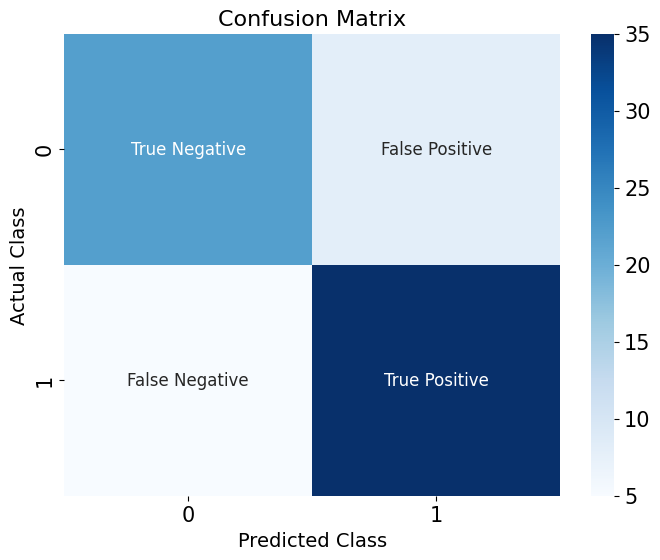

In [ ]:

import matplotlib.pyplot as plt
import seaborn as sns

# Define the confusion matrix
confusion_matrix = np.array([[22, 8],
                             [5, 35]])

# Labels for the confusion matrix
labels = ['True Negative', 'False Positive', 'False Negative', 'True Positive']
labels = np.asarray(labels).reshape(2, 2)

# Create a heatmap with a colorbar
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix, annot=labels, fmt='', cmap='Blues', cbar=True, annot_kws={"size": 12})

# Add a title and labels
plt.title('Confusion Matrix', fontsize=16)
plt.xlabel('Predicted Class', fontsize=14)
plt.ylabel('Actual Class', fontsize=14)

# Save the plot to a file
plt.savefig('confusion_matrix.png')

# Show the plot
plt.show()



In [ ]:
# Download the plot to your local computer
from google.colab import files
files.download('confusion_matrix.png')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## TASK 6: SECOND APPROACH

# Second Approach of Imputation of Missing Values Using K-Nearest Neighbour (KNN)

### Viewing the Dataset with Target Feature with Zero Non Values

In [ ]:
dfheart1.head()

age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
1  39.0  0.0  2.0       NaN  199.0  0.0      1.0    179.0    0.0      0.0   
2  58.0  NaN  0.0     100.0    NaN  0.0      NaN    156.0    0.0      NaN   
3  51.0  NaN  NaN     100.0  222.0  0.0      1.0    143.0    1.0      1.2   
5  58.0  0.0  NaN     100.0  248.0  0.0      0.0    122.0    NaN      1.0   
6  46.0  1.0  1.0     101.0  197.0  1.0      1.0    156.0    NaN      0.0   

   slope   ca  thal  target  
1    NaN  0.0   NaN     1.0  
2    2.0  1.0   3.0     0.0  
3    1.0  0.0   2.0     1.0  
5    1.0  NaN   2.0     1.0  
6    2.0  0.0   3.0     1.0

### Verifying the Number of Non Values in Each Features

In [ ]:
dfheart1.isna().sum()

age         55
sex         36
cp          56
trestbps    51
chol        48
fbs         52
restecg     53
thalach     52
exang       48
oldpeak     43
slope       63
ca          50
thal        42
target       0
dtype: int64

##We did not all remove Rows with Missing Values: because the dataset is not large enough,
##we can dropped the missing values on the target column.

### Using KNN Imputer

In [ ]:
# Initialize the KNN imputer with 5 neighbors
imputer = KNNImputer(n_neighbors=5)

# Perform the imputation
df_imputed = pd.DataFrame(imputer.fit_transform(dfheart1), columns=dfheart1.columns)

# Check the result
df_imputed.head()

age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0  39.0  0.0  2.0     135.2  199.0  0.0      1.0    179.0    0.0     0.00   
1  58.0  1.0  0.0     100.0  245.0  0.0      0.4    156.0    0.0     0.92   
2  51.0  1.0  1.0     100.0  222.0  0.0      1.0    143.0    1.0     1.20   
3  58.0  0.0  1.0     100.0  248.0  0.0      0.0    122.0    0.4     1.00   
4  46.0  1.0  1.0     101.0  197.0  1.0      1.0    156.0    0.2     0.00   

   slope   ca  thal  target  
0    1.6  0.0   2.4     1.0  
1    2.0  1.0   3.0     0.0  
2    1.0  0.0   2.0     1.0  
3    1.0  1.4   2.0     1.0  
4    2.0  0.0   3.0     1.0

### Verifying the Number of Null Values Per Feature

In [ ]:
df_imputed.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

### Transforming the Data Type

In [ ]:
df_heart3 = df_imputed.copy()
column_int = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'ca']
column_cat = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal', 'target']

# Convert integer columns to int32
for col1 in column_int:
    df_heart3[col1] = df_heart3[col1].astype('int32', errors='ignore')

# Convert categorical columns to category
for col2 in column_cat:
    df_heart3[col2] = df_heart3[col2].astype('category')

In [ ]:
df_heart3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245 entries, 0 to 244
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   age       245 non-null    int32   
 1   sex       245 non-null    category
 2   cp        245 non-null    category
 3   trestbps  245 non-null    int32   
 4   chol      245 non-null    int32   
 5   fbs       245 non-null    category
 6   restecg   245 non-null    category
 7   thalach   245 non-null    int32   
 8   exang     245 non-null    category
 9   oldpeak   245 non-null    int32   
 10  slope     245 non-null    category
 11  ca        245 non-null    int32   
 12  thal      245 non-null    category
 13  target    245 non-null    category
dtypes: category(8), int32(6)
memory usage: 10.0 KB


### Exploratory Data Analysis

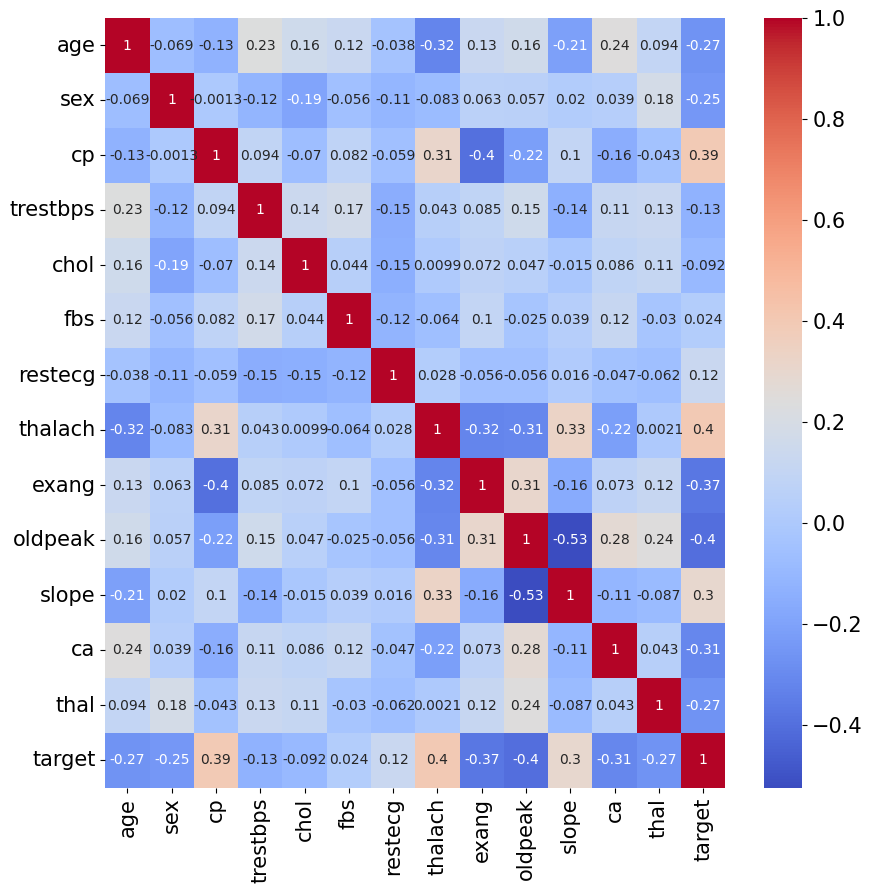

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(df_heart3.corr(), cmap = 'coolwarm', annot = True)
plt.show()

In [ ]:
def lPlot(df_heart3='', figsize=(12, 12), spacing=(0.5, 0.5)):
    cols = list(df_heart3.columns)
    hist = df_heart3.hist()

    # Adjust spacing between subplots
    plt.subplots_adjust(hspace=spacing[0], wspace=spacing[1])

    return hist

array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'trestbps'}>],
       [<Axes: title={'center': 'chol'}>,
        <Axes: title={'center': 'thalach'}>],
       [<Axes: title={'center': 'oldpeak'}>,
        <Axes: title={'center': 'ca'}>]], dtype=object)

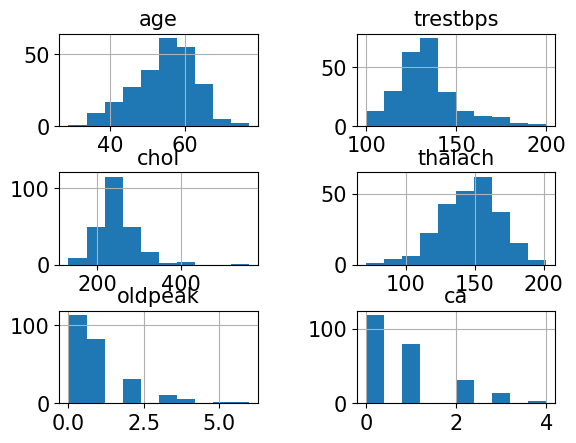

In [ ]:
lPlot(df_heart3)

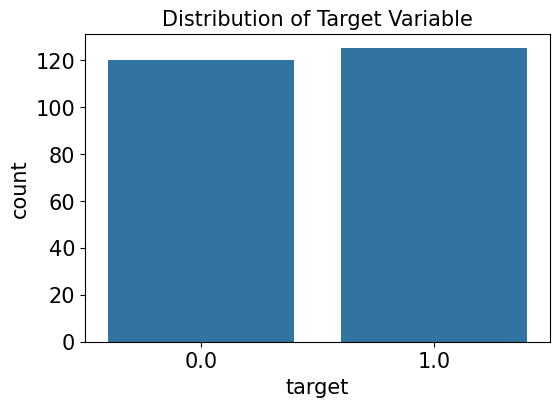

In [ ]:
# Visualize target variable distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='target', data=df_heart3)
plt.title('Distribution of Target Variable')
plt.show()

<Figure size 1400x1000 with 0 Axes>

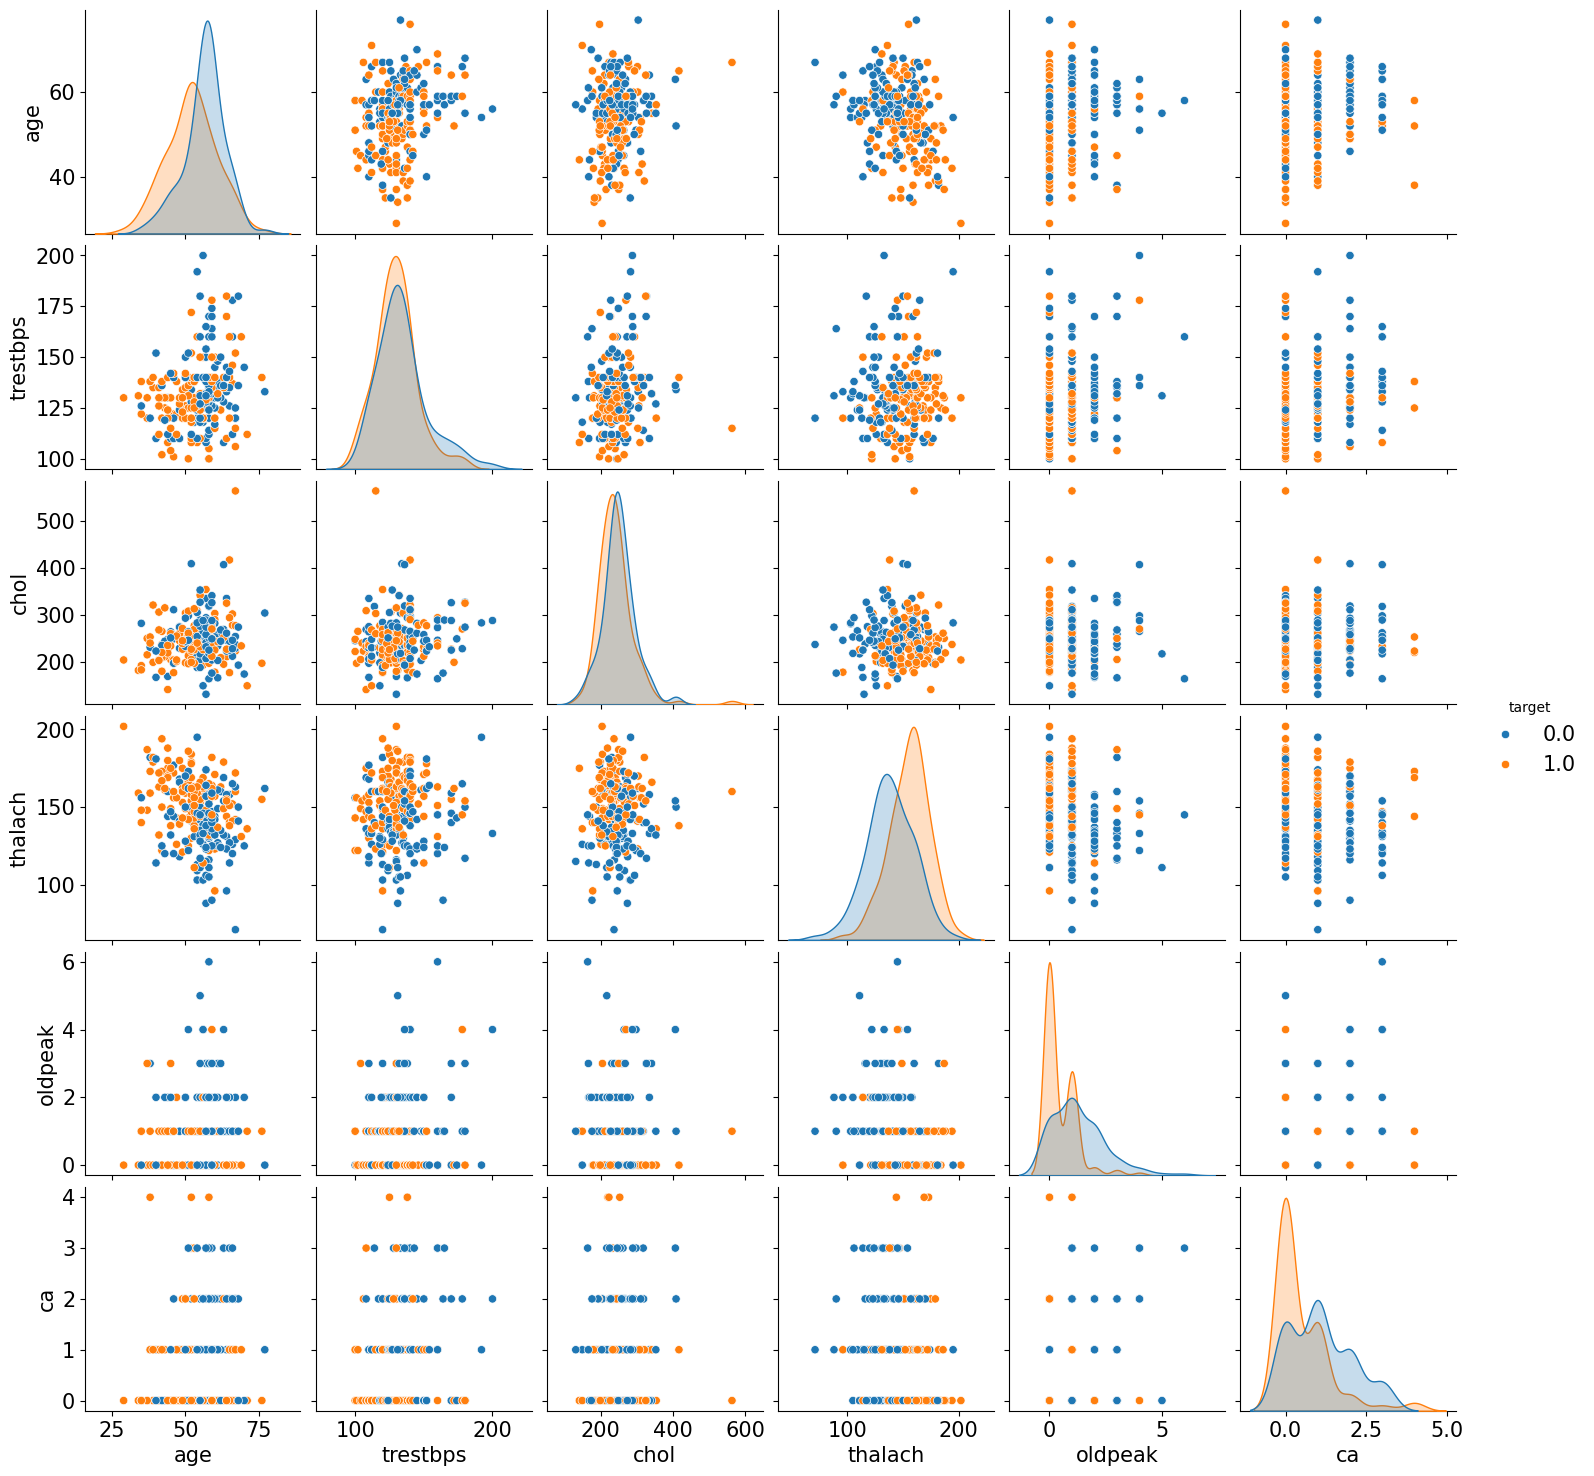

In [ ]:
# Visualize relationships between numeric features and target variable
plt.figure(figsize=(14, 10))
sns.pairplot(df_heart3, hue='target')
plt.show()

### Checking For Outliers

In [ ]:
def boxPlot(df_heart3, figsize=(10, 10)):
    plt.figure(figsize=figsize)
    df_heart3.boxplot()
    plt.title('Box Plot for Heart Disease')
    plt.xlabel('Columns')
    plt.ylabel('Values')
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
    plt.grid(False)
    plt.show()

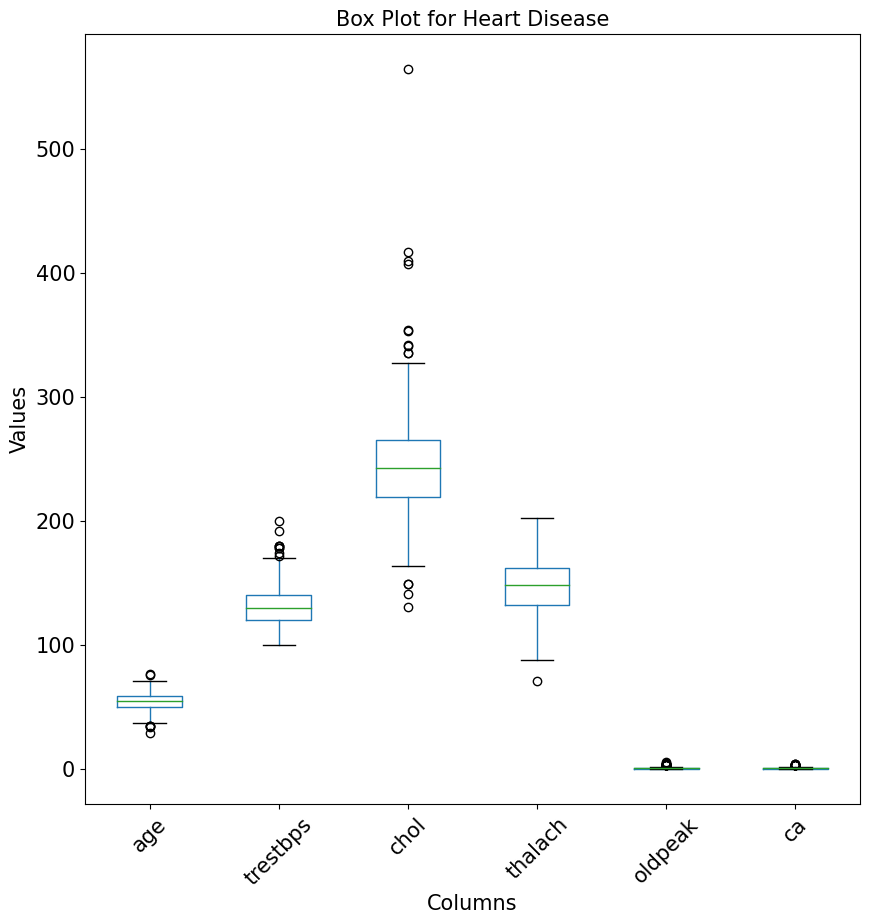

In [ ]:
boxPlot(df_heart3)

## Task 7: Feature Processing and Transformation

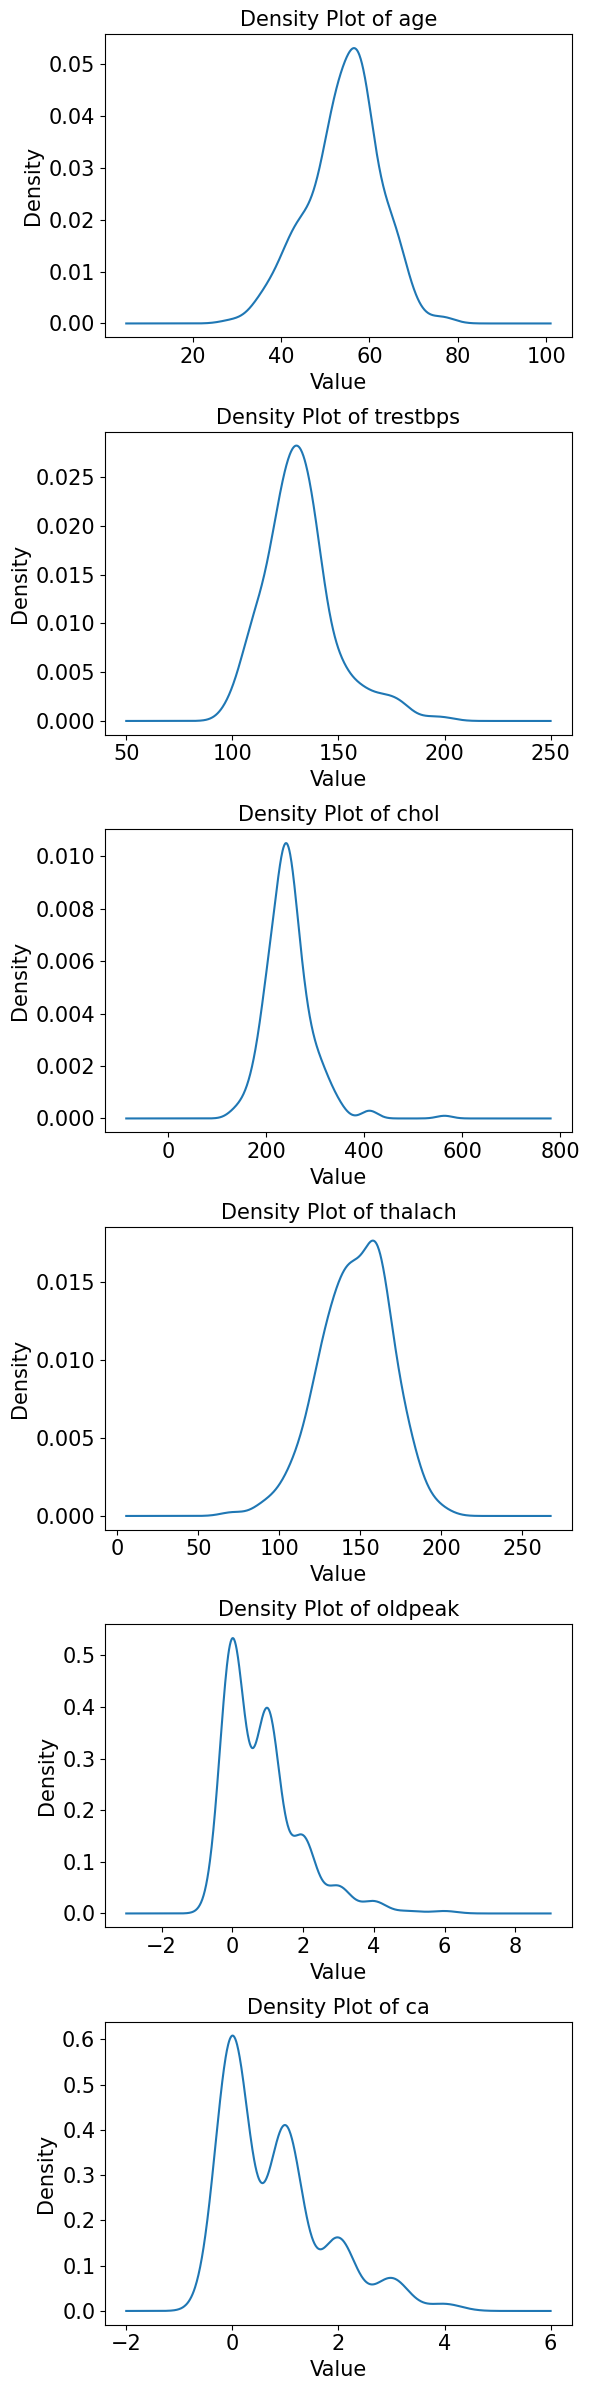

In [ ]:
# Plot density plot for all numerical columns
numerical_columns = df_heart3.select_dtypes(include=['float64', 'int32']).columns

fig, axes = plt.subplots(nrows=len(numerical_columns), figsize=(6, 4*len(numerical_columns)))

for idx, col in enumerate(numerical_columns):
    df_heart3[col].plot(kind='density', ax=axes[idx], title=f'Density Plot of {col}')
    axes[idx].set_xlabel('Value')
    axes[idx].set_ylabel('Density')

plt.tight_layout()
plt.show()

### Detection of Outliers

In [ ]:
df_heart3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245 entries, 0 to 244
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   age       245 non-null    int32   
 1   sex       245 non-null    category
 2   cp        245 non-null    category
 3   trestbps  245 non-null    int32   
 4   chol      245 non-null    int32   
 5   fbs       245 non-null    category
 6   restecg   245 non-null    category
 7   thalach   245 non-null    int32   
 8   exang     245 non-null    category
 9   oldpeak   245 non-null    int32   
 10  slope     245 non-null    category
 11  ca        245 non-null    int32   
 12  thal      245 non-null    category
 13  target    245 non-null    category
dtypes: category(8), int32(6)
memory usage: 10.0 KB


In [ ]:
numerical_vars1=df_heart3.select_dtypes('int32').columns
print(numerical_vars1)
categorical_vars1=df_heart3.select_dtypes('category').columns
print(categorical_vars1)

Index(['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'ca'], dtype='object')
Index(['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal', 'target'], dtype='object')


In [ ]:
def outlier_lims(col):
    q3,q1 = np.percentile(col, [75,25])
    iqr = q3-q1
    upper_lim = q3 + 1.5*iqr
    lower_lim = q1 - 1.5*iqr
    return upper_lim, lower_lim

In [ ]:
for col in numerical_vars1:
    print("--------------------------------------------------")
    print("Column:", col)

    UL,LL = outlier_lims(df_heart3[col])
    print("Upper Limit =", UL)
    print("Lower Limit =", LL)

    total_outliers = len(df_heart3.loc[df_heart3[col]<LL,col]) + len(df_heart3.loc[df_heart3[col]>UL,col])
    percent = (total_outliers / len(df_heart3.index) )*100

    print("Percentage of Outliers=", percent)
    print("-------------------------------------------------- \n")

--------------------------------------------------
Column: age
Upper Limit = 72.5
Lower Limit = 36.5
Percentage of Outliers= 2.857142857142857
-------------------------------------------------- 

--------------------------------------------------
Column: trestbps
Upper Limit = 170.0
Lower Limit = 90.0
Percentage of Outliers= 3.6734693877551026
-------------------------------------------------- 

--------------------------------------------------
Column: chol
Upper Limit = 334.0
Lower Limit = 150.0
Percentage of Outliers= 5.714285714285714
-------------------------------------------------- 

--------------------------------------------------
Column: thalach
Upper Limit = 207.0
Lower Limit = 87.0
Percentage of Outliers= 0.40816326530612246
-------------------------------------------------- 

--------------------------------------------------
Column: oldpeak
Upper Limit = 2.5
Lower Limit = -1.5
Percentage of Outliers= 7.346938775510205
-------------------------------------------------- 



In [ ]:
zscores = np.abs(zscore(df_heart3[['age','trestbps','chol','thalach','oldpeak','ca']]))
filtered_entries = (zscores <3).all(axis=1)
df_heart4 = df_heart3[filtered_entries]

In [ ]:
df_heart4.shape

(229, 14)

In [ ]:
duplicate_rows1 =df_heart4[df_heart4.duplicated()]

# Print the number of duplicate rows
print(f"Number of duplicate rows: {len(duplicate_rows1)}")


Number of duplicate rows: 0


In [ ]:
def boxPlot(df_heart4, figsize=(10, 10)):
    plt.figure(figsize=figsize)
    df_heart4.boxplot()
    plt.title('Box Plot for Heart Disease')
    plt.xlabel('Columns')
    plt.ylabel('Values')
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
    plt.grid(False)
    plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


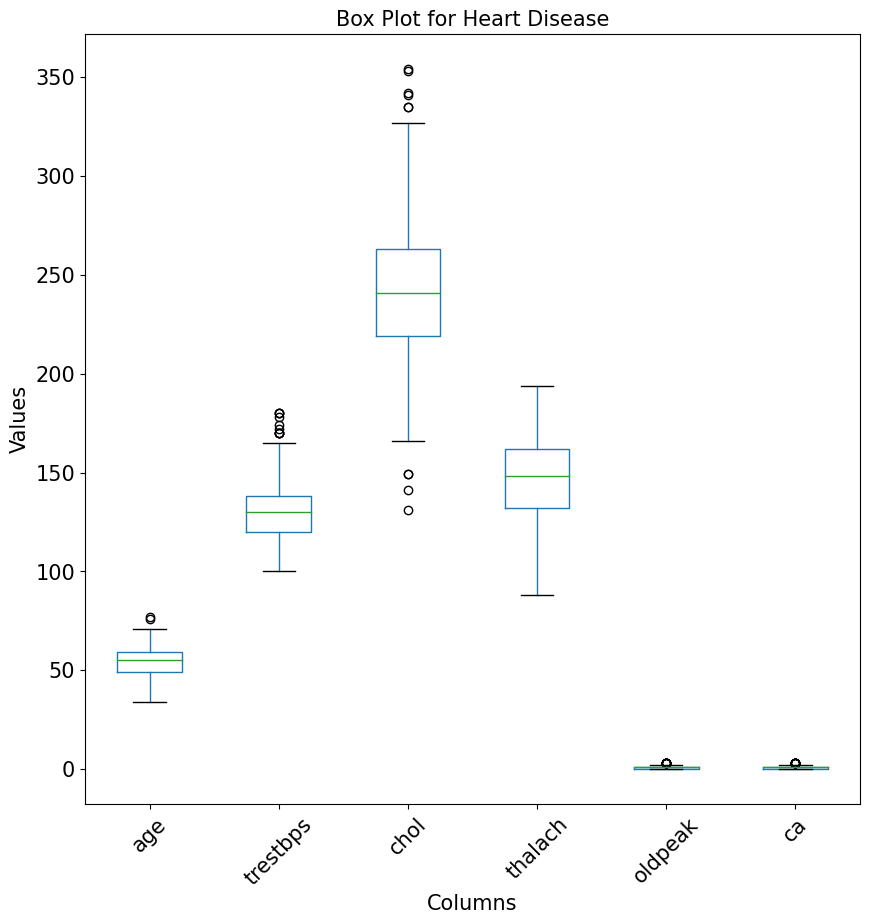

In [ ]:
boxPlot(df_heart4)

### Rescaling of the Dataset

In [ ]:
predictors_df3 = df_heart4.drop(columns='target')
target_df3 = df_heart4['target']

In [ ]:
print(predictors_df3.shape, target_df3.shape)

(229, 13) (229,)


In [ ]:
predictors_dfArr3=predictors_df3.values
predictors_dfArr3

array([[39. ,  0. ,  2. , ...,  1.6,  0. ,  2.4],
       [58. ,  1. ,  0. , ...,  2. ,  1. ,  3. ],
       [51. ,  1. ,  1. , ...,  1. ,  0. ,  2. ],
       ...,
       [68. ,  1. ,  2. , ...,  1. ,  0. ,  3. ],
       [55. ,  0. ,  0. , ...,  1. ,  0. ,  2. ],
       [64. ,  0. ,  0. , ...,  2. ,  0. ,  2. ]])

In [ ]:
X3= predictors_dfArr3[:, 0:13]
X3

scaler3 = MinMaxScaler(feature_range=(0, 1)) #Calling the constructor of the MinMaxScaler Class. Specify range
rescaledX3 = scaler3.fit_transform(X3)
# summarize transformed data
set_printoptions(precision=1)
rescaledX3

array([[0.1, 0. , 0.7, ..., 0.8, 0. , 0.7],
       [0.6, 1. , 0. , ..., 1. , 0.3, 1. ],
       [0.4, 1. , 0.3, ..., 0.5, 0. , 0.5],
       ...,
       [0.8, 1. , 0.7, ..., 0.5, 0. , 1. ],
       [0.5, 0. , 0. , ..., 0.5, 0. , 0.5],
       [0.7, 0. , 0. , ..., 1. , 0. , 0.5]])

In [ ]:
col3= list(predictors_df3.columns)
# converting the rescaled X to a dataframe and adding back Y

rescaledXDF3 = pd.DataFrame(rescaledX3, columns =[col3])
# adding back the outcome column

rescaledXDF3

age  sex        cp trestbps      chol  fbs restecg   thalach exang  \
0    0.116279  0.0  0.666667   0.4375  0.304933  0.0     0.5  0.858491   0.0   
1    0.558140  1.0  0.000000   0.0000  0.511211  0.0     0.2  0.641509   0.0   
2    0.395349  1.0  0.333333   0.0000  0.408072  0.0     0.5  0.518868   1.0   
3    0.558140  0.0  0.333333   0.0000  0.524664  0.0     0.0  0.320755   0.4   
4    0.279070  1.0  0.333333   0.0125  0.295964  1.0     0.5  0.641509   0.2   
..        ...  ...       ...      ...       ...  ...     ...       ...   ...   
224  0.581395  0.0  0.000000   0.9250  0.529148  0.0     0.5  0.518868   1.0   
225  0.744186  0.0  0.000000   0.9750  0.434978  1.0     0.5  0.726415   1.0   
226  0.790698  1.0  0.666667   1.0000  0.641256  1.0     0.0  0.584906   1.0   
227  0.488372  0.0  0.000000   1.0000  0.878924  0.0     1.0  0.273585   1.0   
228  0.697674  0.0  0.000000   1.0000  0.869955  0.0     0.5  0.622642   1.0   

      oldpeak slope        ca thal  
0    0.000000   0.8  0.000000  0.7  
1    0.000000   1.0  0.333333  1.0  
2    0.333333   0.5  0.000000  0.5  
3    0.333333   0.5  0.333333  0.5  
4    0.000000   1.0  0.000000  1.0  
..        ...   ...       ...  ...  
224  0.000000   0.5  0.000000  0.5  
225  0.333333   0.5  0.666667  1.0  
226  0.333333   0.5  0.000000  1.0  
227  1.000000   0.5  0.000000  0.5  
228  0.000000   1.0  0.000000  0.5  

[229 rows x 13 columns]

### Standardising the Dataset

In [ ]:
#Standardizing was done to generate a uniform standard deviation for all the features
scaler1 = StandardScaler()
standardized_df3 = pd.DataFrame(scaler1.fit_transform(rescaledXDF3), columns= rescaledXDF3.columns)
standardized_df3.describe()

age           sex            cp      trestbps          chol  \
count  2.290000e+02  2.290000e+02  2.290000e+02  2.290000e+02  2.290000e+02   
mean  -4.033649e-16  1.163553e-16  7.757017e-18 -3.723368e-16 -2.947666e-16   
std    1.002191e+00  1.002191e+00  1.002191e+00  1.002191e+00  1.002191e+00   
min   -2.533386e+00 -1.584158e+00 -9.881387e-01 -1.946151e+00 -2.806166e+00   
25%   -6.473476e-01 -1.584158e+00 -9.881387e-01 -6.939211e-01 -5.922578e-01   
50%    1.070677e-01  7.003017e-01  4.890879e-02 -6.780632e-02 -3.878075e-02   
75%    6.100112e-01  7.003017e-01  1.085956e+00  4.330855e-01  5.146963e-01   
max    2.873257e+00  7.003017e-01  2.123004e+00  3.062768e+00  2.804079e+00   

                fbs       restecg       thalach         exang       oldpeak  \
count  2.290000e+02  2.290000e+02  2.290000e+02  2.290000e+02  2.290000e+02   
mean  -3.878508e-17  7.757017e-17 -1.124767e-16 -2.521030e-17  6.205613e-17   
std    1.002191e+00  1.002191e+00  1.002191e+00  1.002191e+00  1.002191e+00   
min   -4.161199e-01 -9.804742e-01 -2.869880e+00 -7.530580e-01 -8.824192e-01   
25%   -4.161199e-01 -9.804742e-01 -7.305806e-01 -7.530580e-01 -8.824192e-01   
50%   -4.161199e-01 -1.580251e-01  4.734655e-02 -7.530580e-01  2.789256e-01   
75%   -4.161199e-01  1.075648e+00  7.280328e-01  1.540164e+00  2.789256e-01   
max    2.638093e+00  3.131771e+00  2.283887e+00  1.540164e+00  2.601615e+00   

              slope            ca          thal  
count  2.290000e+02  2.290000e+02  2.290000e+02  
mean   2.617993e-16 -3.878508e-17 -2.792526e-16  
std    1.002191e+00  1.002191e+00  1.002191e+00  
min   -2.673621e+00 -8.409397e-01 -2.312702e+00  
25%   -7.591145e-01 -8.409397e-01 -4.914889e-01  
50%   -3.762132e-01  3.261827e-01 -4.914889e-01  
75%    1.155392e+00  3.261827e-01  1.329724e+00  
max    1.155392e+00  2.660427e+00  1.329724e+00

### Normalisation on Rescaled and Standardized Dataset

In [ ]:
#NORMALIZATION on Rescaled and Standardized data
#From the visualization of the distribution using histogram it can be seen that some features in the dataset were not normal
#Therefore normalization was done to remove skewness from the dataset

standardized_df3.dropna()

# Now you can apply the Normalizer
scaler1 = Normalizer()
normalized_df3 = pd.DataFrame(scaler1.fit_transform(standardized_df3), columns=standardized_df3.columns)
normalized_df3.describe()

age         sex          cp    trestbps        chol         fbs  \
count  229.000000  229.000000  229.000000  229.000000  229.000000  229.000000   
mean    -0.009290    0.009328    0.000218   -0.018923   -0.003015   -0.025225   
std      0.278327    0.292446    0.284921    0.262657    0.268047    0.242024   
min     -0.744321   -0.629693   -0.467129   -0.640964   -0.659042   -0.206776   
25%     -0.195811   -0.313195   -0.257345   -0.203063   -0.194182   -0.137574   
50%      0.029479    0.164890    0.011809   -0.021740   -0.012353   -0.117428   
75%      0.169228    0.217919    0.282039    0.145403    0.159749   -0.096783   
max      0.696634    0.359976    0.654312    0.648875    0.703337    0.727207   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  229.000000  229.000000  229.000000  229.000000  229.000000  229.000000   
mean    -0.000762    0.013455   -0.019133   -0.021887    0.016359   -0.017146   
std      0.290445    0.281952    0.285060    0.279752    0.282500    0.275904   
min     -0.460711   -0.733789   -0.364812   -0.453589   -0.677190   -0.432268   
25%     -0.267601   -0.197332   -0.241441   -0.269963   -0.216999   -0.256779   
50%     -0.062814    0.022990   -0.176450    0.056342   -0.088635    0.065139   
75%      0.298200    0.231946    0.290271    0.094210    0.302952    0.112982   
max      0.657328    0.629823    0.606715    0.664394    0.502563    0.738052   

             thal  
count  229.000000  
mean     0.001169  
std      0.280569  
min     -0.663506  
25%     -0.161619  
50%     -0.125515  
75%      0.309274  
max      0.572462

##TASK 8:Modelling

In [ ]:
predictors_dfArr1=normalized_df1.values
X3= predictors_dfArr3[:, 0:13]

In [ ]:
Y3= target_df3.values
Y3=Y3[:,]
Y3 = Y3.astype(int)
Y3

array([1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1])

In [ ]:
X3 = predictors_df3.values
Y3

array([1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1])

### Spliting Dataset into Training and Testing Datasets

In [ ]:
x_train3, x_test3, y_train3, y_test3 = train_test_split(X3, Y3, test_size=0.3, random_state=42)

### Populating the Various Estimators to Use in Training

In [ ]:
lr = LinearRegression()
dt = DecisionTreeRegressor()
gb = GradientBoostingRegressor()
rf = RandomForestRegressor()
xgb = XGBRegressor()
cbt = CatBoostRegressor()
logRegss = LogisticRegression(random_state=42)
lalgRegss= Lasso()
ridge = Ridge()

names3 = ['Linear Regression','DecisionTree','GradientBoosting','RandomForest','XGB','CATBOOST','logistic_model','Lasso','Rige']
models3 = {'Linear Regression':lr,'DecisionTree':dt,'GradientBoosting':gb,'RandomForest':rf,'XGB':xgb,'CATBOOST':cbt,'logistic_model':logRegss,'Lasso':lalgRegss,'Rige':ridge}

### A Function to Train and Evaluate Populated Estimators

In [ ]:
def evaluate_models(models3, x_train3, x_test3, y_train3, y_test3):
    np.random.seed(42)
    model_scores3 ={}
    for  name3, model3 in models3.items():
        model3.fit(x_train1,y_train1)
        model_scores3[name3] = model3.score(x_test3,y_test3)
    return model_scores3


In [ ]:
model_scores3 = evaluate_models(models3, x_train3, x_test3, y_train3, y_test3)
model_scores3

Learning rate set to 0.03071
0:	learn: 0.4939810	total: 836us	remaining: 835ms
1:	learn: 0.4886976	total: 2.06ms	remaining: 1.03s
2:	learn: 0.4828916	total: 3.08ms	remaining: 1.02s
3:	learn: 0.4772991	total: 4.16ms	remaining: 1.03s
4:	learn: 0.4711289	total: 5.06ms	remaining: 1.01s
5:	learn: 0.4658795	total: 6.12ms	remaining: 1.01s
6:	learn: 0.4609986	total: 7.06ms	remaining: 1s
7:	learn: 0.4553616	total: 8.08ms	remaining: 1s
8:	learn: 0.4502225	total: 9.14ms	remaining: 1.01s
9:	learn: 0.4453771	total: 10.1ms	remaining: 1s
10:	learn: 0.4405143	total: 11ms	remaining: 993ms
11:	learn: 0.4354317	total: 11.9ms	remaining: 983ms
12:	learn: 0.4313682	total: 12.8ms	remaining: 973ms
13:	learn: 0.4267182	total: 13.7ms	remaining: 964ms
14:	learn: 0.4228052	total: 14.6ms	remaining: 957ms
15:	learn: 0.4181556	total: 15.6ms	remaining: 956ms
16:	learn: 0.4140759	total: 16.5ms	remaining: 956ms
17:	learn: 0.4098087	total: 17.5ms	remaining: 955ms
18:	learn: 0.4055116	total: 18.4ms	remaining: 951ms
19:	l

{'Linear Regression': 0.44547354452015797,
 'DecisionTree': 0.30067567567567577,
 'GradientBoosting': 0.5731379286175771,
 'RandomForest': 0.5531142736486487,
 'XGB': 0.46620033294759944,
 'CATBOOST': 0.5952325522946562,
 'logistic_model': 0.7681159420289855,
 'Lasso': 0.1551724982896142,
 'Rige': 0.448750132073796}

In [ ]:
df_model_scores3 = pd.DataFrame(model_scores3.items(), columns=['Model', 'Score'])
df_model_scores3['Score'] = (df_model_scores3['Score'] * 100).round(2)
df_model_scores3

Model  Score
0  Linear Regression  44.55
1       DecisionTree  30.07
2   GradientBoosting  57.31
3       RandomForest  55.31
4                XGB  46.62
5           CATBOOST  59.52
6     logistic_model  76.81
7              Lasso  15.52
8               Rige  44.88

In [ ]:
from google.colab import files

# Save the data frame to a CSV file
df_model_scores3.to_csv('model_scores3.csv', index=False)

# Download the CSV file to your computer
files.download('model_scores3.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### Displaying the Estimators' Performance with Each Other

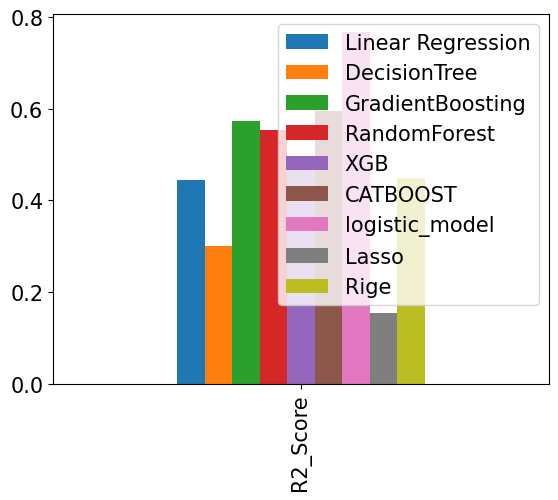

In [ ]:
compare3= pd.DataFrame(model_scores3, index=["R2_Score"])
compare3.plot.bar()
plt.rcParams["figure.figsize"] = (6,6)

<Figure size 1800x1800 with 0 Axes>

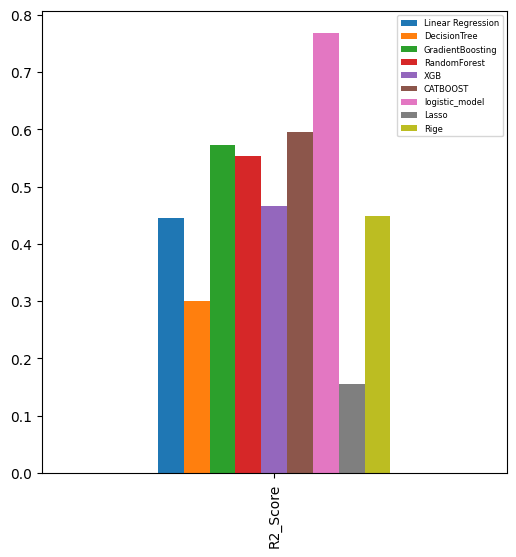

In [ ]:
compare3= pd.DataFrame(model_scores3, index=["R2_Score"])
# Set the figure size
plt.figure(figsize=(18,18))

# Plot the bar chart
fig = compare3.plot.bar()
plt.savefig('heart_disease_plot3.png')
# Increase the text size on the plot
plt.rc('axes', titlesize=10)     # fontsize of the axes title
plt.rc('axes', labelsize=10)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=10)    # fontsize of the x tick labels
plt.rc('ytick', labelsize=10)    # fontsize of the y tick labels
plt.rc('legend', fontsize=6)    # legend fontsize
plt.rc('figure', titlesize=10)  # fontsize of the figure title

# Show the plot
plt.show()

In [ ]:

from google.colab import files

# Download the image file
files.download('heart_disease_plot3.png')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

##TASK 9:Model Evaluation

1.   List item
2.   List item



In [ ]:
# Features and target variable
x3 = X3
y3 = Y3

# Initialize k-fold cross-validation with k=5
kf3 = KFold(n_splits=7, shuffle=True, random_state=1)

# Initialize a model (Logistic Regression in this case)
model3 = LogisticRegression()

# Perform k-fold cross-validation
scores3 = cross_val_score(model, x3, y3, cv=kf3, scoring='accuracy')

# Print the accuracy for each fold
print("Accuracy scores for each fold: ", scores3)

# Print the mean accuracy and standard deviation
print("Mean accuracy: ", scores3.mean())
print("Standard deviation: ", scores3.std())


Accuracy scores for each fold:  [0.7 0.8 0.6 0.8 0.8 0.8 0.8]
Mean accuracy:  0.7380952380952381
Standard deviation:  0.0527756941135784


In [ ]:
x_train3, x_test3, y_train3, y_test3 = train_test_split(X3, Y3, test_size=0.3, random_state=42)

In [ ]:
logRegss.score(x_test3,y_test3)
y_pred3= logRegss.predict(x_test3)
y_pred3

array([0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       1, 0, 1])

In [ ]:
len(y_pred3)

69

In [ ]:
from sklearn.metrics import confusion_matrix

# Calculate confusion matrix
cm3 = confusion_matrix(y_test3, y_pred3)
cm3

array([[26,  6],
       [10, 27]])

### Summary for KNN

A confusion matrix is a table used to evaluate the performance of a classification model by comparing the actual target values with those predicted by the model. Here's a brief explanation of the provided confusion matrix:

```
array([[26,  6],
       [10, 27]], dtype=int64)
```

This confusion matrix can be interpreted as follows:

- **True Positives (TP)**: 27 (bottom right) - The number of positive instances correctly predicted by the model.
- **True Negatives (TN)**: 26 (top left) - The number of negative instances correctly predicted by the model.
- **False Positives (FP)**: 6 (top right) - The number of negative instances incorrectly predicted as positive by the model (also known as Type I errors).
- **False Negatives (FN)**: 10 (bottom left) - The number of positive instances incorrectly predicted as negative by the model (also known as Type II errors).

### Summary:
- **True Positives (TP)**: 27
- **True Negatives (TN)**: 26
- **False Positives (FP)**: 6
- **False Negatives (FN)**: 10

### Metrics Calculation:
Using these values, you can calculate various performance metrics:

1. **Accuracy**: The proportion of the total number of predictions that were correct.
   \[
   \text{Accuracy} = \frac{TP + TN}{TP + TN + FP + FN} = \frac{27 + 26}{27 + 26 + 6 + 10} = \frac{53}{69} \approx 0.768
   \]

2. **Precision**: The proportion of positive predictions that were actually correct.
   \[
   \text{Precision} = \frac{TP}{TP + FP} = \frac{27}{27 + 6} \approx 0.818
   \]

3. **Recall (Sensitivity)**: The proportion of actual positives that were correctly identified.
   \[
   \text{Recall} = \frac{TP}{TP + FN} = \frac{27}{27 + 10} \approx 0.730
   \]

4. **F1 Score**: The harmonic mean of precision and recall, providing a balance between the two.
   \[
   \text{F1 Score} = 2 \times \frac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}} = 2 \times \frac{0.818 \times 0.730}{0.818 + 0.730} \approx 0.772
   \]

These metrics provide insights into the performance of the classification model, indicating its accuracy, precision, recall, and overall effectiveness.